In [4]:
import tensorflow as tf
import tensorflow_hub as hub
# For saving 'feature vectors' into a txt file
import numpy as np
# Glob for reading file names in a folder
import glob
import os.path
import cv2

from sklearn.metrics.pairwise import cosine_similarity
import scipy as sc
import base64
from PIL import Image
import json
from annoy import AnnoyIndex
from tqdm import tqdm

In [108]:
def load_img(path):
    # Reads the image file and returns data type of string
    img = tf.io.read_file(path)
    # Decodes the image to W x H x 3 shape tensor with type of uint8
    img = tf.io.decode_jpeg(img, channels=3)
    # Resizes the image to 224 x 224 x 3 shape tensor
    img = tf.image.resize_with_pad(img, 224, 224)
    # Converts the data type of uint8 to float32 by adding a new axis
    # img becomes 1 x 224 x 224 x 3 tensor with data type of float32
    # This is required for the mobilenet model we are using
    img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]

    return img

In [34]:
image_paths= glob.glob('D:\\Documents\\Semester3\\ADM\\Assignment 3\\Images\\Images_Scraped\\*.jpg')

In [109]:
def get_image_feature_vectors(path):
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    # Loops through all images in a local folder

    print(path)
    # Loads and pre-process the image
    img = load_img(path)
    # Calculate the image feature vector of the img
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(filename) + ".npz"

    out_path = os.path.join('D:/Documents/Semester3/ADM/Assignment 3/Images/Images_Scraped/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')



In [85]:
def get_features(img, image_path): 
     # Definition of module with using tfhub.dev
    module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
    # Loads the module
    module = hub.load(module_handle)
    features = module(img)
    # Remove single-dimensional entries from the 'features' array  
    feature_set = np.squeeze(features)
    print(image_path)

    # Saves the image feature vectors into a file for later use
    outfile_name = os.path.basename(image_path) + ".npz"

    out_path = os.path.join('D:/Documents/Semester3/ADM/Assignment 3/Imgs_Scraped/',outfile_name)
    # Saves the 'feature_set' to a text file
    np.savetxt(out_path, feature_set, delimiter=',')
    vector = np.loadtxt(out_path)
    return vector
    

In [110]:
image_paths= glob.glob('D:\\Documents\\Semester3\\ADM\\Assignment 3\\Pictures\\*.jpg')
vectorfiles = glob.glob('D:\\Documents\\Semester3\\ADM\\Assignment 3\\Images\\Images_Scraped\\*.npz')
# compute styles
image_style_embeddings = {}

for image_path in tqdm(image_paths): 
    image_tensor = load_img(image_path)
    vector = get_features(image_tensor, image_path)
    image_style_embeddings[ntpath.basename(image_path)] = vector
    


  0%|                                                                                          | 0/539 [00:00<?, ?it/s]

  0%|▏                                                                               | 1/539 [00:12<1:49:37, 12.23s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\100679_0.jpg
printing vector
[0.12960547 0.66042525 0.         ... 0.75496095 0.1760048  0.23987186]


  0%|▎                                                                               | 2/539 [00:24<1:49:05, 12.19s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\102680_0.jpg
printing vector
[0.08827133 0.45506296 0.         ... 0.         0.02227173 0.15724596]


  1%|▍                                                                               | 3/539 [00:36<1:48:54, 12.19s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\102680_1.jpg
printing vector
[0.38511378 0.48833302 0.         ... 0.04723736 0.         0.00478259]


  1%|▌                                                                               | 4/539 [00:48<1:48:01, 12.12s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\102680_2.jpg
printing vector
[0.15301391 1.57748199 0.         ... 0.11737771 0.         0.32119077]


  1%|▋                                                                               | 5/539 [01:00<1:47:21, 12.06s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\102680_3.jpg
printing vector
[0.51865363 1.47410905 0.         ... 0.71644992 0.14844537 0.53349328]


  1%|▉                                                                               | 6/539 [01:12<1:47:26, 12.09s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\103091_0.jpg
printing vector
[0.42335278 0.994367   0.         ... 0.1154913  0.10093182 0.01154587]


  1%|█                                                                               | 7/539 [01:24<1:47:03, 12.08s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\10531_0.jpg
printing vector
[0.01210035 0.17724594 0.         ... 0.12113664 0.30567765 1.52297366]


  1%|█▏                                                                              | 8/539 [01:36<1:46:59, 12.09s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\109191_0.jpg
printing vector
[0.         1.01086009 0.03877037 ... 0.28917193 1.13298512 0.19415976]


  2%|█▎                                                                              | 9/539 [01:48<1:46:44, 12.08s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\109191_1.jpg
printing vector
[0.44982505 0.36536944 0.         ... 0.00087808 0.00213898 0.12901358]


  2%|█▍                                                                             | 10/539 [02:00<1:46:19, 12.06s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\109191_2.jpg
printing vector
[0.05803134 1.02839792 0.         ... 0.         0.         0.13019198]


  2%|█▌                                                                             | 11/539 [02:12<1:46:10, 12.07s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\109191_3.jpg
printing vector
[0.03685523 1.25077963 0.         ... 0.         0.         0.96023983]


  2%|█▊                                                                             | 12/539 [02:24<1:45:29, 12.01s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\110386_0.jpg
printing vector
[0.00402946 1.06692445 0.         ... 0.36293435 0.23832929 0.        ]


  2%|█▉                                                                             | 13/539 [02:37<1:46:07, 12.11s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\110386_1.jpg
printing vector
[0.46722388 1.46004748 0.         ... 1.88440859 0.62127197 0.39051795]


  3%|██                                                                             | 14/539 [02:49<1:46:09, 12.13s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112137_0.jpg
printing vector
[0.33161288 1.38411093 0.         ... 0.         0.00824327 0.4616496 ]


  3%|██▏                                                                            | 15/539 [03:01<1:45:07, 12.04s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112137_1.jpg
printing vector
[0.05959173 1.26127815 0.         ... 0.         0.         0.00296115]


  3%|██▎                                                                            | 16/539 [03:13<1:45:09, 12.06s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112137_2.jpg
printing vector
[0.21261601 1.97726285 0.         ... 0.         0.38434473 0.        ]


  3%|██▍                                                                            | 17/539 [03:25<1:45:32, 12.13s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112137_3.jpg
printing vector
[0.06102016 1.28858578 0.         ... 0.         0.03000416 0.02907531]


  3%|██▋                                                                            | 18/539 [03:37<1:45:20, 12.13s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112857_0.jpg
printing vector
[0.78781563 1.6144048  0.         ... 0.00272225 0.01135911 0.        ]


  4%|██▊                                                                            | 19/539 [03:49<1:45:03, 12.12s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112857_1.jpg
printing vector
[0.60524607 0.04543357 0.         ... 0.         0.         0.        ]


  4%|██▉                                                                            | 20/539 [04:01<1:44:36, 12.09s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\112857_2.jpg
printing vector
[1.05081296 1.89012957 0.         ... 0.11668465 0.1380312  0.23975834]


  4%|███                                                                            | 21/539 [04:14<1:44:51, 12.15s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\113928_0.jpg
printing vector
[0.         1.67444515 0.         ... 0.05965504 0.24097836 0.51574719]


  4%|███▏                                                                           | 22/539 [04:26<1:44:41, 12.15s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\113928_1.jpg
printing vector
[0.02295364 2.46089053 0.         ... 0.13371453 0.11049471 0.4446944 ]


  4%|███▎                                                                           | 23/539 [04:38<1:44:25, 12.14s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\114522_0.jpg
printing vector
[0.30515021 0.88162953 0.         ... 0.00921488 0.         0.31170222]


  4%|███▌                                                                           | 24/539 [04:50<1:44:11, 12.14s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\114522_1.jpg
printing vector
[0.30515021 0.88162953 0.         ... 0.00921488 0.         0.31170222]


  5%|███▋                                                                           | 25/539 [05:02<1:44:00, 12.14s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\11485_0.jpg
printing vector
[0.02014343 1.63006508 0.         ... 0.04379932 0.11583117 0.10581402]


  5%|███▊                                                                           | 26/539 [05:15<1:46:35, 12.47s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118313_0.jpg
printing vector
[0.01737665 0.19715273 0.         ... 1.03701639 0.23039946 0.14310691]


  5%|███▉                                                                           | 27/539 [05:27<1:45:23, 12.35s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118493_0.jpg
printing vector
[0.05254974 1.24454844 0.         ... 0.05277383 0.         0.02822545]


  5%|████                                                                           | 28/539 [05:40<1:44:32, 12.27s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118493_1.jpg
printing vector
[0.01479561 0.58089441 0.         ... 0.20591144 0.         0.66832834]


  5%|████▎                                                                          | 29/539 [05:52<1:44:03, 12.24s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118493_2.jpg
printing vector
[0.00456888 0.00893589 0.         ... 0.36882412 0.18238951 0.29706413]


  6%|████▍                                                                          | 30/539 [06:04<1:43:52, 12.25s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118493_3.jpg
printing vector
[0.64542878 0.78487986 0.         ... 0.61276925 0.         0.44442394]


  6%|████▌                                                                          | 31/539 [06:16<1:43:33, 12.23s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\118498_0.jpg
printing vector
[0.         0.21206994 0.         ... 1.67297757 0.53737366 0.        ]


  6%|████▋                                                                          | 32/539 [06:29<1:45:28, 12.48s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\121433_0.jpg
printing vector
[0.25230792 1.53726137 0.         ... 0.47487861 0.10375102 0.0693667 ]


  6%|████▊                                                                          | 33/539 [06:41<1:44:12, 12.36s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\121433_1.jpg
printing vector
[0.02753477 1.30991673 0.         ... 0.04182072 1.20658028 0.46370015]


  6%|████▉                                                                          | 34/539 [06:54<1:44:17, 12.39s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\121433_2.jpg
printing vector
[0.         0.07364699 0.         ... 0.         1.61826158 0.01737624]


  6%|█████▏                                                                         | 35/539 [07:06<1:44:31, 12.44s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123004_0.jpg
printing vector
[0.39895833 0.1928905  0.         ... 0.         0.         0.06669012]


  7%|█████▎                                                                         | 36/539 [07:18<1:43:28, 12.34s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123004_1.jpg
printing vector
[0.10423145 0.05834613 0.         ... 0.02421739 0.00379187 0.01367637]


  7%|█████▍                                                                         | 37/539 [07:30<1:42:30, 12.25s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123598_0.jpg
printing vector
[0.09943496 1.12055063 0.01738911 ... 0.00767762 0.         1.13348746]


  7%|█████▌                                                                         | 38/539 [07:43<1:42:47, 12.31s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123598_1.jpg
printing vector
[0.         0.26903716 0.         ... 0.00872197 0.29891887 0.01649242]


  7%|█████▋                                                                         | 39/539 [07:55<1:41:20, 12.16s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123598_2.jpg
printing vector
[0.         0.20207036 0.         ... 0.1274119  0.69956386 0.74896646]


  7%|█████▊                                                                         | 40/539 [08:07<1:41:00, 12.15s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\123892_0.jpg
printing vector
[0.94480741 0.52194411 0.         ... 0.48314467 0.91302675 0.07406447]


  8%|██████                                                                         | 41/539 [08:19<1:40:36, 12.12s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\127424_0.jpg
printing vector
[0.5308004  0.04873851 0.         ... 0.21666792 0.         0.24684751]


  8%|██████▏                                                                        | 42/539 [08:31<1:41:00, 12.19s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\128255_0.jpg
printing vector
[0.95011216 0.88256663 0.         ... 0.30522248 0.14986943 0.53863925]


  8%|██████▎                                                                        | 43/539 [08:43<1:39:53, 12.08s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\128255_1.jpg
printing vector
[0.40486628 0.82340211 0.         ... 0.10022325 0.05044509 0.01691663]


  8%|██████▍                                                                        | 44/539 [08:55<1:39:55, 12.11s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\128255_2.jpg
printing vector
[0.01557897 0.7093612  0.04792558 ... 0.729559   0.43435401 0.04761982]


  8%|██████▌                                                                        | 45/539 [09:07<1:39:13, 12.05s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\128255_3.jpg
printing vector
[0.5458554  0.72817612 0.         ... 0.07410931 0.07305718 0.        ]


  9%|██████▋                                                                        | 46/539 [09:19<1:39:14, 12.08s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\128319_0.jpg
printing vector
[0.18503679 0.75628    0.         ... 0.01027759 0.08079674 0.        ]


  9%|██████▉                                                                        | 47/539 [09:31<1:39:08, 12.09s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\129692_0.jpg
printing vector
[1.12835370e-01 0.00000000e+00 1.78959705e-02 ... 1.61248809e-05
 6.18296266e-02 0.00000000e+00]


  9%|███████                                                                        | 48/539 [09:44<1:41:00, 12.34s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\130374_0.jpg
printing vector
[0.29083854 0.40808988 0.         ... 0.08709552 0.01148286 0.20634554]


  9%|███████▏                                                                       | 49/539 [09:57<1:41:25, 12.42s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\130374_1.jpg
printing vector
[0.13550365 0.06473675 0.         ... 0.07028062 0.00376128 0.        ]


  9%|███████▎                                                                       | 50/539 [10:09<1:40:13, 12.30s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\130374_2.jpg
printing vector
[0.08812883 0.77407479 0.         ... 0.30275741 1.47604334 0.19915269]


  9%|███████▍                                                                       | 51/539 [10:21<1:40:29, 12.35s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\130374_3.jpg
printing vector
[0.         1.11313796 0.         ... 1.13212705 1.31464422 0.        ]


 10%|███████▌                                                                       | 52/539 [10:35<1:42:19, 12.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\131798_0.jpg
printing vector
[0.08759928 2.1962173  0.         ... 0.42700282 0.41723973 0.31022507]


 10%|███████▊                                                                       | 53/539 [10:47<1:41:58, 12.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\131798_1.jpg
printing vector
[0.10919189 0.53568351 0.         ... 0.10058102 0.78063053 0.1610907 ]


 10%|███████▉                                                                       | 54/539 [11:00<1:41:08, 12.51s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\133266_0.jpg
printing vector
[0.80711293 0.13445923 0.         ... 0.26979777 0.         0.        ]


 10%|████████                                                                       | 55/539 [11:12<1:40:05, 12.41s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\14058_0.jpg
printing vector
[0.03645932 0.83418632 0.         ... 0.         0.31933531 0.02876271]


 10%|████████▏                                                                      | 56/539 [11:24<1:40:15, 12.45s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\141828_0.jpg
printing vector
[0.32103005 0.69150496 0.         ... 0.58224225 0.01240727 0.        ]


 11%|████████▎                                                                      | 57/539 [11:36<1:39:19, 12.36s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143207_0.jpg
printing vector
[0.72708255 1.82684934 0.         ... 0.18821017 0.         0.01291115]


 11%|████████▌                                                                      | 58/539 [11:42<1:23:16, 10.39s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143207_1.jpg
printing vector
[0.03677222 0.77603257 0.         ... 0.         0.0139314  0.12944184]


 11%|████████▋                                                                      | 59/539 [11:47<1:08:41,  8.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143422_0.jpg
printing vector
[1.16416514 0.62557036 0.         ... 0.         0.         0.22268257]


 11%|█████████                                                                        | 60/539 [11:51<58:51,  7.37s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143422_1.jpg
printing vector
[0.75836039 0.27876908 0.         ... 0.02925581 0.         0.14337339]


 11%|█████████▏                                                                       | 61/539 [11:57<54:06,  6.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143422_2.jpg
printing vector
[0.45158315 1.51981747 0.         ... 0.         0.         0.00872393]


 12%|█████████▎                                                                       | 62/539 [12:01<48:40,  6.12s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\143422_3.jpg
printing vector
[0.10981252 0.36086231 0.         ... 0.         0.         0.7921924 ]


 12%|█████████▍                                                                       | 63/539 [12:06<44:36,  5.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\144168_0.jpg
printing vector
[1.74021006e+00 5.47182798e-01 0.00000000e+00 ... 3.81197035e-02
 0.00000000e+00 8.54788988e-04]


 12%|█████████▌                                                                       | 64/539 [12:10<41:57,  5.30s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\144784_0.jpg
printing vector
[1.0286361  2.07624483 0.         ... 0.04026926 0.02995219 0.28688255]


 12%|█████████▊                                                                       | 65/539 [12:15<40:00,  5.07s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\145952_0.jpg
printing vector
[0.05499902 0.13431408 0.         ... 0.98764372 0.09573041 1.0447216 ]


 12%|█████████▉                                                                       | 66/539 [12:19<38:56,  4.94s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\145952_1.jpg
printing vector
[0.17736022 0.45626667 0.         ... 0.03550395 1.5679847  0.21849734]


 12%|██████████                                                                       | 67/539 [12:24<38:00,  4.83s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\145952_2.jpg
printing vector
[0.00099917 0.11485653 0.         ... 0.66482568 0.05056356 0.01044922]


 13%|██████████▏                                                                      | 68/539 [12:28<37:19,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\149939_0.jpg
printing vector
[0.24490909 0.40439123 0.         ... 0.25741073 0.         0.03052176]


 13%|██████████▎                                                                      | 69/539 [12:33<36:47,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\149939_1.jpg
printing vector
[0.42799872 0.83263338 0.         ... 0.23643346 0.         0.        ]


 13%|██████████▌                                                                      | 70/539 [12:38<36:26,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\149939_2.jpg
printing vector
[0.81935942 0.39851201 0.07474792 ... 0.6810956  0.14649016 0.17821877]


 13%|██████████▋                                                                      | 71/539 [12:42<36:12,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\151092_0.jpg
printing vector
[1.01411796 0.37873933 0.         ... 0.14751258 0.         0.62640536]


 13%|██████████▊                                                                      | 72/539 [12:47<35:29,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\151435_0.jpg
printing vector
[0.         0.06419598 0.         ... 0.59910244 0.06127096 0.13990429]


 14%|██████████▉                                                                      | 73/539 [12:51<35:17,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\151435_1.jpg
printing vector
[0.         1.09107256 0.         ... 0.15336941 0.26347262 0.63017046]


 14%|███████████                                                                      | 74/539 [12:56<35:17,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\151435_2.jpg
printing vector
[0.02930256 0.9720611  0.         ... 0.01167319 0.00620633 0.        ]


 14%|███████████▎                                                                     | 75/539 [13:01<36:15,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\151435_3.jpg
printing vector
[0.         1.25495172 0.         ... 0.20496564 0.03344699 0.75218171]


 14%|███████████▍                                                                     | 76/539 [13:05<35:40,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\154272_0.jpg
printing vector
[0.08647769 0.11227071 0.         ... 0.07200783 0.08636075 0.33808827]


 14%|███████████▌                                                                     | 77/539 [13:10<37:13,  4.83s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\155250_0.jpg
printing vector
[0.90532243 0.09446258 0.         ... 0.0551744  0.         0.61325759]


 14%|███████████▋                                                                     | 78/539 [13:15<36:31,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\155473_0.jpg
printing vector
[0.05674002 1.41551685 0.         ... 0.0881182  0.85883349 0.38363808]


 15%|███████████▊                                                                     | 79/539 [13:20<37:47,  4.93s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\155473_1.jpg
printing vector
[0.23491319 1.36098385 0.         ... 0.         0.7014789  0.10559436]


 15%|████████████                                                                     | 80/539 [13:25<36:55,  4.83s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\157190_0.jpg
printing vector
[0.03441542 1.50168872 0.         ... 0.0913265  0.94264418 0.23586012]


 15%|████████████▏                                                                    | 81/539 [13:30<38:17,  5.02s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\157190_1.jpg
printing vector
[8.21614787e-02 1.78572929e+00 2.67187431e-02 ... 5.34320367e-04
 6.29111648e-01 1.62302822e-01]


 15%|████████████▎                                                                    | 82/539 [13:35<37:16,  4.89s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\157190_2.jpg
printing vector
[0.24208896 2.14527011 0.         ... 0.         0.80731744 0.06719347]


 15%|████████████▍                                                                    | 83/539 [13:40<36:32,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\157190_3.jpg
printing vector
[0.07221622 1.1979605  0.         ... 0.16586354 0.67292929 1.79303014]


 16%|████████████▌                                                                    | 84/539 [13:44<35:59,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\157546_0.jpg
printing vector
[0.33844787 0.00646255 0.         ... 0.08668765 0.13906741 0.00398581]


 16%|████████████▊                                                                    | 85/539 [13:49<35:37,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\15759_0.jpg
printing vector
[0.02327199 0.10024397 0.         ... 1.48629749 0.21604005 1.15346026]


 16%|████████████▉                                                                    | 86/539 [13:53<35:17,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158081_0.jpg
printing vector
[0.30409867 0.33261418 0.         ... 0.04047002 0.         0.10275359]


 16%|█████████████                                                                    | 87/539 [13:58<34:38,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158690_0.jpg
printing vector
[0.65246689 1.51898921 0.         ... 0.         0.63196993 0.76808971]


 16%|█████████████▏                                                                   | 88/539 [14:02<34:34,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158690_1.jpg
printing vector
[0.37410599 0.48315138 0.         ... 0.         0.04639686 0.29935709]


 17%|█████████████▎                                                                   | 89/539 [14:07<34:34,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158997_0.jpg
printing vector
[0.07366832 2.47053099 0.         ... 0.05016714 1.23033583 0.31692278]


 17%|█████████████▌                                                                   | 90/539 [14:12<34:18,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158997_1.jpg
printing vector
[0.02224034 1.56421244 0.         ... 0.14517954 1.00235927 0.4775632 ]


 17%|█████████████▋                                                                   | 91/539 [14:16<34:05,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\158997_2.jpg
printing vector
[0.55986065 1.61116695 0.         ... 0.00688972 0.01711072 0.09531809]


 17%|█████████████▊                                                                   | 92/539 [14:21<34:02,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\160838_0.jpg
printing vector
[1.15195131 1.79397631 0.         ... 0.         0.         0.63875622]


 17%|█████████████▉                                                                   | 93/539 [14:25<34:11,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\161817_0.jpg
printing vector
[0.08179995 2.64308548 0.         ... 0.02841553 0.00951854 0.12346891]


 17%|██████████████▏                                                                  | 94/539 [14:30<33:59,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\161817_1.jpg
printing vector
[0.03721357 1.43108213 0.         ... 0.17119429 0.89737958 0.16079965]


 18%|██████████████▎                                                                  | 95/539 [14:35<34:08,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\162403_0.jpg
printing vector
[0.99985319 0.52085847 0.         ... 0.         0.0409752  0.11937856]


 18%|██████████████▍                                                                  | 96/539 [14:39<34:04,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\163990_0.jpg
printing vector
[0.06101517 0.         0.         ... 0.         0.         2.0954268 ]


 18%|██████████████▌                                                                  | 97/539 [14:44<33:56,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\166708_0.jpg
printing vector
[0.11633875 1.5261656  0.         ... 0.         0.38584471 0.08693825]


 18%|██████████████▋                                                                  | 98/539 [14:48<33:54,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\167454_0.jpg
printing vector
[0.19292407 0.15502512 0.         ... 0.55635887 0.78005117 0.        ]


 18%|██████████████▉                                                                  | 99/539 [14:53<33:48,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\167614_0.jpg
printing vector
[0.27417222 0.23244578 0.         ... 0.21847744 0.04656964 0.65617347]


 19%|██████████████▊                                                                 | 100/539 [14:58<35:14,  4.82s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\180920_0.jpg
printing vector
[0.51957518 0.11131162 0.         ... 0.93260956 0.12253395 0.01357936]


 19%|██████████████▉                                                                 | 101/539 [15:03<34:38,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\181584_0.jpg
printing vector
[0.38952354 0.4819659  0.00116702 ... 0.         0.00764419 0.03119186]


 19%|███████████████▏                                                                | 102/539 [15:08<34:26,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\182585_0.jpg
printing vector
[0.264985   0.26115713 0.         ... 1.16416001 0.0308211  0.37759531]


 19%|███████████████▎                                                                | 103/539 [15:12<34:45,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\18337_0.jpg
printing vector
[1.51671135 0.02375142 0.00179965 ... 0.07487755 0.01252426 0.        ]


 19%|███████████████▍                                                                | 104/539 [15:17<34:00,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\184950_0.jpg
printing vector
[0.22136343 0.02986057 0.         ... 0.20169114 0.13741097 0.01029829]


 19%|███████████████▌                                                                | 105/539 [15:22<33:43,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\184950_1.jpg
printing vector
[0.         1.07103741 0.         ... 0.02384472 0.04053209 1.57588446]


 20%|███████████████▋                                                                | 106/539 [15:26<34:15,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\184950_2.jpg
printing vector
[0.         0.43822169 0.         ... 0.         1.26591325 1.17135584]


 20%|███████████████▉                                                                | 107/539 [15:31<34:20,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\186721_0.jpg
printing vector
[0.26389691 0.88928348 0.         ... 0.61468661 0.         0.08723654]


 20%|████████████████                                                                | 108/539 [15:36<34:18,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\190588_0.jpg
printing vector
[0.20389234 0.81598634 0.         ... 0.21508886 0.13893369 0.07475325]


 20%|████████████████▏                                                               | 109/539 [15:41<34:12,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\193078_0.jpg
printing vector
[0.04573818 0.00321072 0.         ... 0.01581171 0.11982505 0.20569985]


 20%|████████████████▎                                                               | 110/539 [15:46<34:28,  4.82s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\194097_0.jpg
printing vector
[0.36680272 2.07563853 0.         ... 0.56115234 0.         0.22348368]


 21%|████████████████▍                                                               | 111/539 [15:50<33:53,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\194097_1.jpg
printing vector
[0.25643551 1.46606994 0.         ... 0.0677191  0.         0.        ]


 21%|████████████████▌                                                               | 112/539 [15:55<33:35,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\194130_0.jpg
printing vector
[0.3294223  0.01374216 0.         ... 0.         0.01764681 0.04990031]


 21%|████████████████▊                                                               | 113/539 [15:59<32:51,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\194130_1.jpg
printing vector
[0.3294223  0.01374216 0.         ... 0.         0.01764681 0.04990031]


 21%|████████████████▉                                                               | 114/539 [16:04<32:57,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\195425_0.jpg
printing vector
[0.54640758 1.13870192 0.         ... 0.         0.         0.08614817]


 21%|█████████████████                                                               | 115/539 [16:09<32:50,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\202096_0.jpg
printing vector
[0.0727465  0.55983859 0.         ... 0.06362511 0.25368109 0.        ]


 22%|█████████████████▏                                                              | 116/539 [16:13<32:21,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\203684_0.jpg
printing vector
[0.         0.84961724 0.         ... 0.150187   0.         0.42062071]


 22%|█████████████████▎                                                              | 117/539 [16:18<32:03,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\203684_1.jpg
printing vector
[0.10835554 0.87859845 0.         ... 0.1927094  0.34106201 0.66365123]


 22%|█████████████████▌                                                              | 118/539 [16:22<32:06,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\206432_0.jpg
printing vector
[0.15826458 0.10099819 0.         ... 0.63434672 0.         0.44585225]


 22%|█████████████████▋                                                              | 119/539 [16:27<31:56,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\206432_1.jpg
printing vector
[1.2367028  0.         0.         ... 0.73312598 0.         0.19251816]


 22%|█████████████████▊                                                              | 120/539 [16:31<31:53,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\206784_0.jpg
printing vector
[0.77598906 1.9835459  0.         ... 0.85143608 0.20844562 0.80620885]


 22%|█████████████████▉                                                              | 121/539 [16:36<31:50,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\207563_0.jpg
printing vector
[0.78590846 0.50788474 0.         ... 0.         0.         0.03529174]


 23%|██████████████████                                                              | 122/539 [16:41<31:43,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208827_0.jpg
printing vector
[0.0938167  0.47803715 0.         ... 0.33179435 0.         0.01206706]


 23%|██████████████████▎                                                             | 123/539 [16:45<31:37,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208827_1.jpg
printing vector
[2.10477066e+00 9.45770741e-01 3.08698538e-04 ... 3.88945453e-02
 8.06401595e-02 1.16456285e-01]


 23%|██████████████████▍                                                             | 124/539 [16:50<31:48,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208827_2.jpg
printing vector
[0.94983321 0.29480931 0.         ... 0.16576985 0.12839276 0.3628301 ]


 23%|██████████████████▌                                                             | 125/539 [16:54<31:22,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208928_0.jpg
printing vector
[0.22169589 2.40227747 0.111864   ... 0.01970738 0.89050269 0.86595666]


 23%|██████████████████▋                                                             | 126/539 [16:59<31:26,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208928_1.jpg
printing vector
[0.01300211 1.3268106  0.         ... 0.38509619 0.2637572  1.40590858]


 24%|██████████████████▊                                                             | 127/539 [17:03<31:12,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\208928_2.jpg
printing vector
[0.20922424 0.56411076 0.         ... 0.03125424 0.18290058 0.08992619]


 24%|██████████████████▉                                                             | 128/539 [17:08<32:03,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\214687_0.jpg
printing vector
[0.         1.17570341 0.         ... 1.83617139 0.48979518 0.82932973]


 24%|███████████████████▏                                                            | 129/539 [17:13<32:13,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\215016_0.jpg
printing vector
[1.33475351 0.66868663 0.         ... 0.04769358 1.01359558 0.17955843]


 24%|███████████████████▎                                                            | 130/539 [17:18<32:19,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\216595_0.jpg
printing vector
[0.00483797 1.39432085 0.         ... 0.43089271 0.87391692 0.50291002]


 24%|███████████████████▍                                                            | 131/539 [17:23<32:26,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\216595_1.jpg
printing vector
[3.20023388e-01 1.66450000e+00 0.00000000e+00 ... 1.56996306e-02
 7.00278208e-03 1.01058825e-03]


 24%|███████████████████▌                                                            | 132/539 [17:28<32:39,  4.82s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\220810_0.jpg
printing vector
[1.34160471 0.06545111 0.01570957 ... 0.01629501 0.         0.41680789]


 25%|███████████████████▋                                                            | 133/539 [17:32<32:06,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\221029_0.jpg
printing vector
[0.11579239 0.84114182 0.         ... 0.         0.56047851 0.03101427]


 25%|███████████████████▉                                                            | 134/539 [17:37<31:52,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\221029_1.jpg
printing vector
[0.08930273 0.44071555 0.         ... 0.         0.81692022 0.06437781]


 25%|████████████████████                                                            | 135/539 [17:42<31:31,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\221726_0.jpg
printing vector
[0.90266645 0.06156662 0.         ... 0.04153045 0.00741033 0.29491106]


 25%|████████████████████▏                                                           | 136/539 [17:46<31:15,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224263_0.jpg
printing vector
[0.0429475  0.93609053 0.         ... 0.         0.81951779 0.29531449]


 25%|████████████████████▎                                                           | 137/539 [17:51<31:04,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224263_1.jpg
printing vector
[0.07339147 1.27691054 0.         ... 0.51871544 0.10568969 0.        ]


 26%|████████████████████▍                                                           | 138/539 [17:55<30:55,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224462_0.jpg
printing vector
[0.34575993 0.75315267 0.         ... 0.0841726  0.         1.06510842]


 26%|████████████████████▋                                                           | 139/539 [18:01<31:58,  4.80s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224462_1.jpg
printing vector
[0.29837382 0.30173329 0.         ... 0.         0.         0.69202799]


 26%|████████████████████▊                                                           | 140/539 [18:05<31:31,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224462_2.jpg
printing vector
[0.07707455 0.75194019 0.         ... 0.08404395 0.         0.67618644]


 26%|████████████████████▉                                                           | 141/539 [18:10<31:10,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\224462_3.jpg
printing vector
[0.11046989 0.23820402 0.         ... 0.24406604 0.09928573 0.22919659]


 26%|█████████████████████                                                           | 142/539 [18:14<30:55,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\226541_0.jpg
printing vector
[0.01302616 1.57225251 0.         ... 0.51681137 0.50927436 0.26882556]


 27%|█████████████████████▏                                                          | 143/539 [18:19<30:41,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\227713_0.jpg
printing vector
[0.0161397  2.08001709 0.         ... 0.         1.26963854 0.03976426]


 27%|█████████████████████▎                                                          | 144/539 [18:24<30:29,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\227713_1.jpg
printing vector
[0.0161397  2.08001709 0.         ... 0.         1.26963854 0.03976426]


 27%|█████████████████████▌                                                          | 145/539 [18:28<30:20,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\228362_0.jpg
printing vector
[0.00412607 0.11168678 0.         ... 0.06230895 0.14952399 0.79153949]


 27%|█████████████████████▋                                                          | 146/539 [18:33<30:08,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\230534_0.jpg
printing vector
[0.2928932  1.52797866 0.         ... 0.72292757 0.53864789 0.18199493]


 27%|█████████████████████▊                                                          | 147/539 [18:37<30:04,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\231578_0.jpg
printing vector
[0.83883727 2.30444002 0.         ... 0.03704555 0.05140921 0.00894787]


 27%|█████████████████████▉                                                          | 148/539 [18:42<29:56,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\231578_1.jpg
printing vector
[0.03423265 0.3105543  0.         ... 0.         1.4382987  0.12659004]


 28%|██████████████████████                                                          | 149/539 [18:46<29:52,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\23158_0.jpg
printing vector
[0.71928126 1.74923551 0.         ... 0.         0.         0.        ]


 28%|██████████████████████▎                                                         | 150/539 [18:51<29:47,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\232999_0.jpg
printing vector
[0.96616566 0.14860344 0.         ... 0.13114931 0.09734329 0.        ]


 28%|██████████████████████▍                                                         | 151/539 [18:56<29:39,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\236626_0.jpg
printing vector
[0.         0.3379311  0.         ... 0.27680314 0.         0.23212168]


 28%|██████████████████████▌                                                         | 152/539 [19:00<29:39,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\236929_0.jpg
printing vector
[0.79001725 0.48847088 0.         ... 0.68886691 0.0185723  0.01797054]


 28%|██████████████████████▋                                                         | 153/539 [19:05<29:12,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\236929_1.jpg
printing vector
[0.15058687 0.21058291 0.         ... 0.35815501 0.11523607 0.09225187]


 29%|██████████████████████▊                                                         | 154/539 [19:09<29:11,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\236929_2.jpg
printing vector
[0.25125372 0.81515831 0.         ... 0.         0.02946385 0.26773763]


 29%|███████████████████████                                                         | 155/539 [19:14<29:16,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\236929_3.jpg
printing vector
[0.18633971 0.00576621 0.         ... 0.         0.05829349 0.05142328]


 29%|███████████████████████▏                                                        | 156/539 [19:18<29:08,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239049_0.jpg
printing vector
[0.00229612 0.4475365  0.         ... 0.09700794 0.37159282 0.39994562]


 29%|███████████████████████▎                                                        | 157/539 [19:24<30:37,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239049_1.jpg
printing vector
[0.20882089 0.42233479 0.         ... 0.13526405 0.         0.13611089]


 29%|███████████████████████▍                                                        | 158/539 [19:28<29:55,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239049_2.jpg
printing vector
[0.21278577 0.11006334 0.         ... 0.16821848 0.02146646 0.13210377]


 29%|███████████████████████▌                                                        | 159/539 [19:34<31:12,  4.93s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239049_3.jpg
printing vector
[0.11136941 0.04114898 0.         ... 0.14531142 0.00287259 1.25169408]


 30%|███████████████████████▋                                                        | 160/539 [19:38<30:20,  4.80s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239233_0.jpg
printing vector
[0.08447997 0.08959258 0.         ... 0.13823223 0.15214427 0.13709512]


 30%|███████████████████████▉                                                        | 161/539 [19:43<29:49,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239233_1.jpg
printing vector
[0.03345739 1.38369656 0.         ... 0.84120679 0.19923034 0.08674022]


 30%|████████████████████████                                                        | 162/539 [19:47<29:26,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\239233_2.jpg
printing vector
[0.         1.19248104 0.         ... 0.         0.         0.00776804]


 30%|████████████████████████▏                                                       | 163/539 [19:52<29:08,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\242100_0.jpg
printing vector
[0.78016889 1.41750646 0.         ... 0.39961571 0.9896003  0.23110771]


 30%|████████████████████████▎                                                       | 164/539 [19:57<28:52,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\242986_0.jpg
printing vector
[0.01339797 0.81682515 0.         ... 1.25793576 0.43268117 0.16014574]


 31%|████████████████████████▍                                                       | 165/539 [20:01<28:59,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\243819_0.jpg
printing vector
[0.01408344 0.80477846 0.         ... 0.80912375 0.50390774 0.34306401]


 31%|████████████████████████▋                                                       | 166/539 [20:06<28:44,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\244108_0.jpg
printing vector
[0.04853159 1.37754536 0.         ... 0.30865481 0.58822805 0.715361  ]


 31%|████████████████████████▊                                                       | 167/539 [20:11<29:05,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\245534_0.jpg
printing vector
[0.40642521 1.01664472 0.         ... 0.         0.40976831 0.00739819]


 31%|████████████████████████▉                                                       | 168/539 [20:15<28:54,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\245639_0.jpg
printing vector
[0.0090293  1.89958346 0.         ... 1.75872743 1.25783622 0.50260842]


 31%|█████████████████████████                                                       | 169/539 [20:20<28:46,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\245639_1.jpg
printing vector
[0.         0.13209718 0.         ... 0.         0.83223516 0.00228613]


 32%|█████████████████████████▏                                                      | 170/539 [20:24<28:13,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\245639_2.jpg
printing vector
[0.         0.22787577 0.         ... 0.12425531 1.28124356 0.02386766]


 32%|█████████████████████████▍                                                      | 171/539 [20:29<28:02,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\245639_3.jpg
printing vector
[2.63235974 0.78116006 0.         ... 0.         0.07791719 0.04309212]


 32%|█████████████████████████▌                                                      | 172/539 [20:33<27:56,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\248779_0.jpg
printing vector
[1.08282208 0.5359264  0.         ... 0.09183598 0.57987779 0.        ]


 32%|█████████████████████████▋                                                      | 173/539 [20:38<27:48,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250370_0.jpg
printing vector
[0.         1.83167207 0.         ... 0.         0.03391561 0.        ]


 32%|█████████████████████████▊                                                      | 174/539 [20:42<27:38,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250370_1.jpg
printing vector
[0.         0.91910988 0.         ... 1.12147486 0.         0.25835186]


 32%|█████████████████████████▉                                                      | 175/539 [20:48<28:38,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250370_2.jpg
printing vector
[0.         0.92822236 0.         ... 0.55728757 0.00726042 0.        ]


 33%|██████████████████████████                                                      | 176/539 [20:52<28:15,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250608_0.jpg
printing vector
[0.96353066 1.34666133 0.09376238 ... 0.         0.06328075 0.        ]


 33%|██████████████████████████▎                                                     | 177/539 [20:57<28:09,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250608_1.jpg
printing vector
[2.47721121e-01 2.42322206e+00 1.10500690e-03 ... 0.00000000e+00
 2.48092529e-03 1.39203560e+00]


 33%|██████████████████████████▍                                                     | 178/539 [21:01<27:55,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\250608_2.jpg
printing vector
[0.00315901 0.46249887 0.         ... 0.19408564 0.         0.30933636]


 33%|██████████████████████████▌                                                     | 179/539 [21:06<27:45,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\253099_0.jpg
printing vector
[0.04235579 1.13794971 0.         ... 0.61441302 1.15882182 1.58962166]


 33%|██████████████████████████▋                                                     | 180/539 [21:11<27:54,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\253201_0.jpg
printing vector
[0.11073846 0.92558146 0.         ... 0.32361543 1.19615436 0.17814085]


 34%|██████████████████████████▊                                                     | 181/539 [21:15<27:24,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\259837_0.jpg
printing vector
[0.06015585 1.35614252 0.         ... 0.02034579 0.31933424 0.3272391 ]


 34%|███████████████████████████                                                     | 182/539 [21:20<28:38,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\260010_0.jpg
printing vector
[0.34669656 2.188416   0.         ... 0.17067286 0.31390801 0.18033472]


 34%|███████████████████████████▏                                                    | 183/539 [21:25<28:10,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\260010_1.jpg
printing vector
[0.56816387 1.33390903 0.         ... 0.         0.         0.        ]


 34%|███████████████████████████▎                                                    | 184/539 [21:30<27:43,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\260010_2.jpg
printing vector
[0.10923415 0.49486619 0.03714794 ... 0.00110087 0.         0.        ]


 34%|███████████████████████████▍                                                    | 185/539 [21:34<27:21,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\260010_3.jpg
printing vector
[0.34669656 2.188416   0.         ... 0.17067286 0.31390801 0.18033472]


 35%|███████████████████████████▌                                                    | 186/539 [21:39<27:08,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\261125_0.jpg
printing vector
[0.20914906 0.65891689 0.         ... 1.15820932 0.06175301 0.34775382]


 35%|███████████████████████████▊                                                    | 187/539 [21:43<27:07,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\261125_1.jpg
printing vector
[0.31166691 0.         0.         ... 0.09291255 0.24731274 0.        ]


 35%|███████████████████████████▉                                                    | 188/539 [21:48<26:42,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\261125_2.jpg
printing vector
[0.01569368 1.37858343 0.         ... 0.91570616 0.00731927 0.12197224]


 35%|████████████████████████████                                                    | 189/539 [21:52<26:41,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\261125_3.jpg
printing vector
[0.29577264 0.54994678 0.         ... 0.79874963 0.         0.15544936]


 35%|████████████████████████████▏                                                   | 190/539 [21:57<26:28,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\262913_0.jpg
printing vector
[0.08452743 2.10910106 0.         ... 1.45686555 1.68081903 0.59328473]


 35%|████████████████████████████▎                                                   | 191/539 [22:02<26:32,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\263716_0.jpg
printing vector
[0.16552272 1.27142131 0.         ... 0.         0.11420827 0.17498326]


 36%|████████████████████████████▍                                                   | 192/539 [22:06<26:37,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\26567_0.jpg
printing vector
[0.         1.09255433 0.         ... 0.02340599 0.51966333 0.71724325]


 36%|████████████████████████████▋                                                   | 193/539 [22:11<26:31,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\26567_1.jpg
printing vector
[0.         0.37321165 0.         ... 0.02376961 0.05411413 0.19125901]


 36%|████████████████████████████▊                                                   | 194/539 [22:15<26:27,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\26567_2.jpg
printing vector
[0.52708465 2.33269119 0.         ... 0.         1.40171158 0.14616373]


 36%|████████████████████████████▉                                                   | 195/539 [22:20<26:22,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\26567_3.jpg
printing vector
[0.         1.57653105 0.         ... 0.08621995 0.32603538 0.13810913]


 36%|█████████████████████████████                                                   | 196/539 [22:25<26:18,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\266092_0.jpg
printing vector
[0.00811191 1.02278447 0.03515547 ... 0.         1.29038143 0.00584215]


 37%|█████████████████████████████▏                                                  | 197/539 [22:29<26:11,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\266385_0.jpg
printing vector
[0.07804476 0.33147508 0.         ... 0.02142956 0.00756942 0.02690913]


 37%|█████████████████████████████▍                                                  | 198/539 [22:34<26:15,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267022_0.jpg
printing vector
[0.10741936 0.39509821 0.         ... 0.0092228  0.01687016 0.00317414]


 37%|█████████████████████████████▌                                                  | 199/539 [22:39<27:11,  4.80s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267022_1.jpg
printing vector
[0.76815534 0.3251116  0.02219817 ... 0.01020168 0.         0.28556326]


 37%|█████████████████████████████▋                                                  | 200/539 [22:44<26:32,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267022_2.jpg
printing vector
[0.50981605 1.06269598 0.         ... 0.         0.         0.17371726]


 37%|█████████████████████████████▊                                                  | 201/539 [22:48<26:15,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267022_3.jpg
printing vector
[1.42462265 1.0957042  0.01559088 ... 0.         0.         0.04717364]


 37%|█████████████████████████████▉                                                  | 202/539 [22:53<26:11,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267090_0.jpg
printing vector
[0.03711448 0.27836344 0.02630616 ... 1.32174468 1.70716751 0.19880645]


 38%|██████████████████████████████▏                                                 | 203/539 [22:57<25:54,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267090_1.jpg
printing vector
[1.0198983  0.01315498 0.         ... 0.65200484 0.02475449 0.13818459]


 38%|██████████████████████████████▎                                                 | 204/539 [23:02<25:40,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267090_2.jpg
printing vector
[0.         0.27857798 0.         ... 0.14804351 0.05543951 0.0241756 ]


 38%|██████████████████████████████▍                                                 | 205/539 [23:06<25:38,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267090_3.jpg
printing vector
[0.30607522 0.92723918 0.         ... 0.16687037 0.01367006 0.29336664]


 38%|██████████████████████████████▌                                                 | 206/539 [23:11<25:27,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267708_0.jpg
printing vector
[0.06591509 1.67915404 0.         ... 0.09605768 0.29462665 0.35990024]


 38%|██████████████████████████████▋                                                 | 207/539 [23:16<25:15,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267708_1.jpg
printing vector
[0.00000000e+00 1.47311056e+00 0.00000000e+00 ... 6.31274015e-04
 1.61040563e-03 1.52056947e-01]


 39%|██████████████████████████████▊                                                 | 208/539 [23:20<25:21,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\267966_0.jpg
printing vector
[0.21239904 1.82459044 0.         ... 0.08074628 0.         0.25040573]


 39%|███████████████████████████████                                                 | 209/539 [23:25<24:59,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\269363_0.jpg
printing vector
[0.28539911 0.34171948 0.         ... 0.04875317 1.44826305 0.72580749]


 39%|███████████████████████████████▏                                                | 210/539 [23:29<25:01,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\269363_1.jpg
printing vector
[0.61658359 1.73916161 0.         ... 0.15625322 1.14380658 0.42317644]


 39%|███████████████████████████████▎                                                | 211/539 [23:34<24:49,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\269363_2.jpg
printing vector
[0.82128733 2.40098405 0.         ... 0.75492877 1.68887746 0.17848097]


 39%|███████████████████████████████▍                                                | 212/539 [23:38<24:48,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\269363_3.jpg
printing vector
[0.41157758 0.52060461 0.         ... 0.1480117  0.         0.40063018]


 40%|███████████████████████████████▌                                                | 213/539 [23:43<24:55,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\271378_0.jpg
printing vector
[0.22634362 1.97698534 0.05181361 ... 0.42787638 0.27546492 0.2463862 ]


 40%|███████████████████████████████▊                                                | 214/539 [23:48<24:53,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\271378_1.jpg
printing vector
[0.25272536 1.18186581 0.         ... 0.13216156 0.         0.66830134]


 40%|███████████████████████████████▉                                                | 215/539 [23:52<24:51,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\272479_0.jpg
printing vector
[0.07849705 0.62998086 0.         ... 0.06249675 0.08694229 0.1563888 ]


 40%|████████████████████████████████                                                | 216/539 [23:57<24:46,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\272479_1.jpg
printing vector
[0.06979392 0.69047499 0.         ... 0.         0.         0.        ]


 40%|████████████████████████████████▏                                               | 217/539 [24:02<25:25,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\272479_2.jpg
printing vector
[8.91252995e-01 0.00000000e+00 2.25000843e-01 ... 0.00000000e+00
 0.00000000e+00 1.18328600e-04]


 40%|████████████████████████████████▎                                               | 218/539 [24:06<25:09,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\272479_3.jpg
printing vector
[0.46119985 0.11044177 0.         ... 0.64521003 0.         0.        ]


 41%|████████████████████████████████▌                                               | 219/539 [24:12<26:25,  4.96s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\273015_0.jpg
printing vector
[0.02788881 0.34111974 0.         ... 0.15946156 0.03531169 0.51801097]


 41%|████████████████████████████████▋                                               | 220/539 [24:17<25:50,  4.86s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\273015_1.jpg
printing vector
[0.1502443  0.22832197 0.         ... 0.34960777 0.01344273 0.17479946]


 41%|████████████████████████████████▊                                               | 221/539 [24:21<25:02,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\273015_2.jpg
printing vector
[0.06340943 0.16944484 0.         ... 0.36342782 0.54911995 0.91794211]


 41%|████████████████████████████████▉                                               | 222/539 [24:26<24:44,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\273015_3.jpg
printing vector
[0.22069257 0.00027829 0.         ... 0.12584881 0.01728523 0.21508914]


 41%|█████████████████████████████████                                               | 223/539 [24:30<24:29,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\273697_0.jpg
printing vector
[1.87941098 1.5853703  0.10454436 ... 0.0656718  0.12798829 0.        ]


 42%|█████████████████████████████████▏                                              | 224/539 [24:35<25:02,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\274617_0.jpg
printing vector
[0.42771605 1.01830411 0.         ... 0.23064771 0.01094586 0.28523645]


 42%|█████████████████████████████████▍                                              | 225/539 [24:40<24:27,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\279368_0.jpg
printing vector
[0.75081611 0.57418853 0.02075657 ... 0.04437042 1.99636531 0.24803683]


 42%|█████████████████████████████████▌                                              | 226/539 [24:44<24:17,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\279709_0.jpg
printing vector
[0.06532389 0.36118799 0.         ... 0.         0.77608186 0.00782141]


 42%|█████████████████████████████████▋                                              | 227/539 [24:49<24:02,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\279709_1.jpg
printing vector
[0.062036   1.38378382 0.         ... 0.25168964 0.13326633 0.40851617]


 42%|█████████████████████████████████▊                                              | 228/539 [24:54<23:58,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\27996_0.jpg
printing vector
[0.26936519 0.29842159 0.         ... 0.32234356 0.         0.05994624]


 42%|█████████████████████████████████▉                                              | 229/539 [24:58<23:51,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\2804_0.jpg
printing vector
[0.7988953  0.10548789 0.10300273 ... 0.92580187 0.         0.04504479]


 43%|██████████████████████████████████▏                                             | 230/539 [25:03<23:46,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\280669_0.jpg
printing vector
[0.18645306 0.34003618 0.         ... 0.         0.         0.3112281 ]


 43%|██████████████████████████████████▎                                             | 231/539 [25:07<23:42,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\280669_1.jpg
printing vector
[0.18568015 0.72507477 0.         ... 0.         0.01185381 0.08830071]


 43%|██████████████████████████████████▍                                             | 232/539 [25:12<23:40,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\288299_0.jpg
printing vector
[1.20263481 0.95515496 0.         ... 0.00666354 0.         0.02912103]


 43%|██████████████████████████████████▌                                             | 233/539 [25:17<23:44,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\290325_0.jpg
printing vector
[0.02093068 1.67360973 0.         ... 0.         0.37313652 0.05569373]


 43%|██████████████████████████████████▋                                             | 234/539 [25:22<24:28,  4.82s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\290806_0.jpg
printing vector
[0.17068468 0.19156475 0.         ... 0.01236403 0.28579229 0.23222867]


 44%|██████████████████████████████████▉                                             | 235/539 [25:27<24:05,  4.76s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\291068_0.jpg
printing vector
[0.28284863 0.09139347 0.         ... 0.         0.         0.        ]


 44%|███████████████████████████████████                                             | 236/539 [25:31<23:42,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\291068_1.jpg
printing vector
[0.28284863 0.09139347 0.         ... 0.         0.         0.        ]


 44%|███████████████████████████████████▏                                            | 237/539 [25:36<23:30,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\291068_2.jpg
printing vector
[0.28284863 0.09139347 0.         ... 0.         0.         0.        ]


 44%|███████████████████████████████████▎                                            | 238/539 [25:40<23:24,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\29224_0.jpg
printing vector
[0.03325036 2.3559742  0.         ... 1.20432568 1.20285249 0.6073221 ]


 44%|███████████████████████████████████▍                                            | 239/539 [25:45<23:17,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\292275_0.jpg
printing vector
[0.21906567 0.6428827  0.         ... 0.02226827 0.26677719 0.        ]


 45%|███████████████████████████████████▌                                            | 240/539 [25:50<23:09,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\292529_0.jpg
printing vector
[0.04233331 0.99254912 0.29650152 ... 0.00971926 0.00448489 0.        ]


 45%|███████████████████████████████████▊                                            | 241/539 [25:54<23:07,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\29415_0.jpg
printing vector
[1.98463678 1.24107027 0.02439006 ... 0.00650604 0.00448742 0.00777687]


 45%|███████████████████████████████████▉                                            | 242/539 [25:59<23:00,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\29462_0.jpg
printing vector
[0.34272537 1.40202904 0.         ... 0.54431778 0.         0.19301173]


 45%|████████████████████████████████████                                            | 243/539 [26:04<23:10,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\29462_1.jpg
printing vector
[0.65977776 0.76579875 0.         ... 0.10128652 0.08465718 0.36736339]


 45%|████████████████████████████████████▏                                           | 244/539 [26:08<22:56,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\294742_0.jpg
printing vector
[0.34372875 1.74526072 0.         ... 0.12115583 0.45033777 0.27131909]


 45%|████████████████████████████████████▎                                           | 245/539 [26:13<22:40,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\294742_1.jpg
printing vector
[0.51701993 1.97695506 0.01800501 ... 0.26509428 0.25802132 0.00372833]


 46%|████████████████████████████████████▌                                           | 246/539 [26:18<23:22,  4.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\295229_0.jpg
printing vector
[0.21575533 1.76303089 0.         ... 0.22270215 0.39894107 0.43377978]


 46%|████████████████████████████████████▋                                           | 247/539 [26:24<24:20,  5.00s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296168_0.jpg
printing vector
[0.15421423 0.8792417  0.01180424 ... 0.28898233 0.15756047 0.        ]


 46%|████████████████████████████████████▊                                           | 248/539 [26:29<24:29,  5.05s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296345_0.jpg
printing vector
[0.55230874 0.56106955 0.         ... 0.3085278  1.17545497 0.        ]


 46%|████████████████████████████████████▉                                           | 249/539 [26:33<23:43,  4.91s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296709_0.jpg
printing vector
[0.00991881 0.07911082 0.         ... 1.19005406 0.66284567 0.32880464]


 46%|█████████████████████████████████████                                           | 250/539 [26:38<23:03,  4.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296709_1.jpg
printing vector
[0.40115342 0.09301263 0.         ... 0.01645351 0.0382601  0.15399155]


 47%|█████████████████████████████████████▎                                          | 251/539 [26:42<22:43,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296709_2.jpg
printing vector
[0.07204372 2.32225847 0.         ... 0.13170768 0.0038851  0.11108246]


 47%|█████████████████████████████████████▍                                          | 252/539 [26:47<22:24,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296862_0.jpg
printing vector
[0.         1.87818706 0.         ... 0.00885593 0.15274577 0.1228118 ]


 47%|█████████████████████████████████████▌                                          | 253/539 [26:52<22:11,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\296862_1.jpg
printing vector
[3.24956141e-02 1.09720170e+00 0.00000000e+00 ... 2.36501495e-04
 7.69889355e-01 2.68328916e-02]


 47%|█████████████████████████████████████▋                                          | 254/539 [26:56<22:05,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\297349_0.jpg
printing vector
[0.         1.89690101 0.         ... 0.51949763 0.05586882 0.01377079]


 47%|█████████████████████████████████████▊                                          | 255/539 [27:01<21:48,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\298302_0.jpg
printing vector
[0.03295196 1.57712865 0.         ... 0.05605478 2.13646102 0.08611581]


 47%|█████████████████████████████████████▉                                          | 256/539 [27:05<21:37,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\299327_0.jpg
printing vector
[0.24175318 0.20958628 0.         ... 1.41930473 0.         0.        ]


 48%|██████████████████████████████████████▏                                         | 257/539 [27:10<21:36,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\299327_1.jpg
printing vector
[0.         0.05357322 0.         ... 0.37882483 0.         0.10638036]


 48%|██████████████████████████████████████▎                                         | 258/539 [27:14<21:26,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\299327_2.jpg
printing vector
[1.12883747 0.74124753 0.         ... 0.0047726  1.48888874 0.        ]


 48%|██████████████████████████████████████▍                                         | 259/539 [27:19<21:20,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\300629_0.jpg
printing vector
[0.08871596 2.03005147 0.         ... 0.87211871 0.9573136  1.4424361 ]


 48%|██████████████████████████████████████▌                                         | 260/539 [27:24<21:27,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\301292_0.jpg
printing vector
[0.0235879  3.02399611 0.         ... 0.10050268 0.04825494 0.36709285]


 48%|██████████████████████████████████████▋                                         | 261/539 [27:28<21:21,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\301292_1.jpg
printing vector
[0.         2.16042542 0.         ... 0.64289135 0.04135933 0.12125629]


 49%|██████████████████████████████████████▉                                         | 262/539 [27:33<21:17,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\301292_2.jpg
printing vector
[0.17307149 0.26624072 0.         ... 0.19606006 0.64216751 0.0083274 ]


 49%|███████████████████████████████████████                                         | 263/539 [27:38<21:15,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\301865_0.jpg
printing vector
[1.55237687 2.31560349 0.         ... 0.1703275  0.02248175 0.16606319]


 49%|███████████████████████████████████████▏                                        | 264/539 [27:42<21:14,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\30293_0.jpg
printing vector
[0.         0.12387081 0.         ... 0.61309212 0.0462044  0.02837752]


 49%|███████████████████████████████████████▎                                        | 265/539 [27:47<20:52,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\30293_1.jpg
printing vector
[0.12206014 0.87716073 0.         ... 0.72252703 0.         2.21423221]


 49%|███████████████████████████████████████▍                                        | 266/539 [27:51<20:55,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303103_0.jpg
printing vector
[0.         1.80059934 0.         ... 1.08177578 0.24095871 0.1941461 ]


 50%|███████████████████████████████████████▋                                        | 267/539 [27:56<20:54,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303496_0.jpg
printing vector
[0.0948464  0.33968917 0.         ... 0.         1.26757991 0.33079427]


 50%|███████████████████████████████████████▊                                        | 268/539 [28:00<20:40,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303833_0.jpg
printing vector
[0.         0.08089729 0.         ... 0.45656717 1.00266349 0.        ]


 50%|███████████████████████████████████████▉                                        | 269/539 [28:05<20:27,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303833_1.jpg
printing vector
[0.05928679 0.93474001 0.         ... 0.0915826  0.30313811 0.58714062]


 50%|████████████████████████████████████████                                        | 270/539 [28:09<20:27,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303993_0.jpg
printing vector
[0.07783296 1.03047836 0.         ... 0.95263338 0.         0.08133296]


 50%|████████████████████████████████████████▏                                       | 271/539 [28:14<20:19,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303993_1.jpg
printing vector
[0.15992455 1.79552698 0.         ... 0.06818817 0.08256759 0.05281163]


 50%|████████████████████████████████████████▎                                       | 272/539 [28:19<20:20,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303993_2.jpg
printing vector
[0.4173649  0.97159189 0.         ... 0.0063934  0.         0.39570308]


 51%|████████████████████████████████████████▌                                       | 273/539 [28:23<20:11,  4.55s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\303993_3.jpg
printing vector
[1.58784068 0.65854394 0.         ... 0.50125003 0.01453264 0.18673749]


 51%|████████████████████████████████████████▋                                       | 274/539 [28:29<21:29,  4.86s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\307692_0.jpg
printing vector
[0.88264322 0.02514005 0.         ... 0.03466997 0.14011207 0.45429534]


 51%|████████████████████████████████████████▊                                       | 275/539 [28:33<20:49,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\310085_0.jpg
printing vector
[0.22429886 1.3921479  0.         ... 0.01551374 1.19362652 0.07015447]


 51%|████████████████████████████████████████▉                                       | 276/539 [28:38<20:31,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\312646_0.jpg
printing vector
[0.         0.12413816 0.         ... 0.42107901 0.02958261 0.00049145]


 51%|█████████████████████████████████████████                                       | 277/539 [28:42<20:21,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\312646_1.jpg
printing vector
[0.31589529 0.98305559 0.         ... 0.36096054 0.         0.        ]


 52%|█████████████████████████████████████████▎                                      | 278/539 [28:47<20:15,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\316568_0.jpg
printing vector
[0.3924945  0.2247657  0.         ... 0.75992513 0.51550949 0.13750593]


 52%|█████████████████████████████████████████▍                                      | 279/539 [28:51<19:59,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\317861_0.jpg
printing vector
[0.44496652 1.55922294 0.         ... 0.51335049 0.04577951 0.02457806]


 52%|█████████████████████████████████████████▌                                      | 280/539 [28:57<21:07,  4.89s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\321091_0.jpg
printing vector
[0.24523938 1.81497049 0.         ... 0.32036886 0.         1.33560753]


 52%|█████████████████████████████████████████▋                                      | 281/539 [29:02<21:15,  4.94s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\322664_0.jpg
printing vector
[0.1394539  2.33269835 0.         ... 0.44748819 0.03959557 0.        ]


 52%|█████████████████████████████████████████▊                                      | 282/539 [29:07<20:52,  4.87s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\322883_0.jpg
printing vector
[0.         0.23863129 0.         ... 0.         0.         2.11854792]


 53%|██████████████████████████████████████████                                      | 283/539 [29:11<20:26,  4.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\322883_1.jpg
printing vector
[0.0656674  0.22546834 0.         ... 0.         0.04759218 0.5431602 ]


 53%|██████████████████████████████████████████▏                                     | 284/539 [29:16<20:07,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\327255_0.jpg
printing vector
[0.         0.72313768 0.         ... 0.42958453 0.21415073 0.90772146]


 53%|██████████████████████████████████████████▎                                     | 285/539 [29:21<19:50,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\329461_0.jpg
printing vector
[0.01122009 1.43386233 0.         ... 0.63237208 1.0956378  0.13023633]


 53%|██████████████████████████████████████████▍                                     | 286/539 [29:25<19:39,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\329461_1.jpg
printing vector
[0.14284669 0.06099917 0.         ... 1.3617028  0.         0.99581552]


 53%|██████████████████████████████████████████▌                                     | 287/539 [29:30<19:31,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\329461_2.jpg
printing vector
[0.04240265 0.79470968 0.         ... 0.00162231 0.05696305 0.00606361]


 53%|██████████████████████████████████████████▋                                     | 288/539 [29:34<19:11,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\329461_3.jpg
printing vector
[0.00280347 1.66446495 0.         ... 0.37023473 0.40618566 0.22907874]


 54%|██████████████████████████████████████████▉                                     | 289/539 [29:40<20:20,  4.88s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\329944_0.jpg
printing vector
[0.03609236 0.18102451 0.         ... 0.04062562 0.         0.        ]


 54%|███████████████████████████████████████████                                     | 290/539 [29:45<20:59,  5.06s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\330951_0.jpg
printing vector
[0.13866146 0.62613964 0.         ... 0.07906777 0.00640139 0.20845479]


 54%|███████████████████████████████████████████▏                                    | 291/539 [29:50<20:21,  4.93s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\330951_1.jpg
printing vector
[0.09747428 0.         0.         ... 0.56095695 0.         0.40814379]


 54%|███████████████████████████████████████████▎                                    | 292/539 [29:55<19:53,  4.83s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\330951_2.jpg
printing vector
[1.18131006 0.10524016 0.         ... 0.38396654 0.         0.18880187]


 54%|███████████████████████████████████████████▍                                    | 293/539 [29:59<19:36,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\333856_0.jpg
printing vector
[0.15453377 1.58362341 0.         ... 0.92423433 0.02340647 0.57032162]


 55%|███████████████████████████████████████████▋                                    | 294/539 [30:04<19:19,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\333856_1.jpg
printing vector
[0.15453377 1.58362341 0.         ... 0.92423433 0.02340647 0.57032162]


 55%|███████████████████████████████████████████▊                                    | 295/539 [30:09<19:53,  4.89s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\333856_2.jpg
printing vector
[0.15453377 1.58362341 0.         ... 0.92423433 0.02340647 0.57032162]


 55%|███████████████████████████████████████████▉                                    | 296/539 [30:14<19:28,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\334878_0.jpg
printing vector
[0.07983535 0.73713923 0.         ... 1.17129552 0.         0.        ]


 55%|████████████████████████████████████████████                                    | 297/539 [30:18<18:52,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\334878_1.jpg
printing vector
[0.0305564  1.03062832 0.         ... 0.05954053 0.53621417 0.89528155]


 55%|████████████████████████████████████████████▏                                   | 298/539 [30:23<19:42,  4.91s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\334878_2.jpg
printing vector
[0.49141949 2.73828769 0.         ... 0.03880697 0.         1.23652589]


 55%|████████████████████████████████████████████▍                                   | 299/539 [30:28<19:15,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\334878_3.jpg
printing vector
[1.69313514 1.52865994 0.         ... 0.26919103 0.39525872 0.        ]


 56%|████████████████████████████████████████████▌                                   | 300/539 [30:33<18:51,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\335678_0.jpg
printing vector
[0.97153378 0.45152342 0.         ... 0.31747743 0.30858663 0.        ]


 56%|████████████████████████████████████████████▋                                   | 301/539 [30:37<18:34,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\338220_0.jpg
printing vector
[0.26374349 1.1595968  0.         ... 0.00896689 0.         0.23049679]


 56%|████████████████████████████████████████████▊                                   | 302/539 [30:42<18:24,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\338220_1.jpg
printing vector
[0.2268748  1.046983   0.         ... 0.08780842 0.         0.27674407]


 56%|████████████████████████████████████████████▉                                   | 303/539 [30:46<18:11,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\338220_2.jpg
printing vector
[0.04322187 0.34800902 0.         ... 0.37655187 0.         0.01553243]


 56%|█████████████████████████████████████████████                                   | 304/539 [30:51<18:09,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\343427_0.jpg
printing vector
[0.07427208 0.01145835 0.         ... 0.08249503 0.82637483 0.0011672 ]


 57%|█████████████████████████████████████████████▎                                  | 305/539 [30:56<18:04,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\344798_0.jpg
printing vector
[0.0290703  1.70892215 0.         ... 0.04040021 1.01839173 0.15879907]


 57%|█████████████████████████████████████████████▍                                  | 306/539 [31:00<17:50,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\345278_0.jpg
printing vector
[1.42578387 0.71384031 0.         ... 0.03378804 0.6204381  0.09961952]


 57%|█████████████████████████████████████████████▌                                  | 307/539 [31:05<17:43,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\345278_1.jpg
printing vector
[0.47567007 1.92019975 0.         ... 0.         0.03307781 0.16986313]


 57%|█████████████████████████████████████████████▋                                  | 308/539 [31:09<17:41,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\345278_2.jpg
printing vector
[0.06237289 0.65005809 0.         ... 0.20322055 0.         0.50961232]


 57%|█████████████████████████████████████████████▊                                  | 309/539 [31:14<17:54,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\345278_3.jpg
printing vector
[0.45840144 0.64585733 0.         ... 0.27961183 0.01377844 1.24813175]


 58%|██████████████████████████████████████████████                                  | 310/539 [31:19<17:41,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\34646_0.jpg
printing vector
[0.07449926 1.56289816 0.05032797 ... 0.05165377 0.         0.34801435]


 58%|██████████████████████████████████████████████▏                                 | 311/539 [31:23<17:39,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\34646_1.jpg
printing vector
[0.17090081 1.62787151 0.07731165 ... 0.27467662 0.05995066 0.36996424]


 58%|██████████████████████████████████████████████▎                                 | 312/539 [31:29<18:29,  4.89s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\34646_2.jpg
printing vector
[0.77149171 0.13136381 0.         ... 0.         0.         0.        ]


 58%|██████████████████████████████████████████████▍                                 | 313/539 [31:33<18:06,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\34646_3.jpg
printing vector
[0.40831244 0.17167395 0.         ... 0.24371412 0.         0.00540448]


 58%|██████████████████████████████████████████████▌                                 | 314/539 [31:38<17:48,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\348052_0.jpg
printing vector
[0.23369859 1.64694357 0.         ... 0.00624565 0.14407264 0.02725349]


 58%|██████████████████████████████████████████████▊                                 | 315/539 [31:43<17:35,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\348326_0.jpg
printing vector
[0.         2.69599748 0.         ... 0.06391072 0.02450843 0.54986   ]


 59%|██████████████████████████████████████████████▉                                 | 316/539 [31:47<17:26,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\348720_0.jpg
printing vector
[1.23497987 2.11537528 0.         ... 0.2052457  0.29348573 0.00419381]


 59%|███████████████████████████████████████████████                                 | 317/539 [31:52<17:25,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\349015_0.jpg
printing vector
[0.14684604 1.36036205 0.         ... 0.06365985 0.13212942 1.00816929]


 59%|███████████████████████████████████████████████▏                                | 318/539 [31:57<17:02,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\350496_0.jpg
printing vector
[0.         1.87171471 0.         ... 0.89059085 0.23742481 1.03150046]


 59%|███████████████████████████████████████████████▎                                | 319/539 [32:01<16:54,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\35170_0.jpg
printing vector
[0.02871116 0.33087325 0.         ... 0.57241678 0.98204225 0.        ]


 59%|███████████████████████████████████████████████▍                                | 320/539 [32:06<16:51,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\354605_0.jpg
printing vector
[0.5023427  2.45462489 0.         ... 0.         0.         0.01238287]


 60%|███████████████████████████████████████████████▋                                | 321/539 [32:10<16:41,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\354605_1.jpg
printing vector
[0.6089083  1.7834512  0.         ... 0.12382222 0.         0.        ]


 60%|███████████████████████████████████████████████▊                                | 322/539 [32:15<16:30,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\354605_2.jpg
printing vector
[0.67113745 1.21915197 0.         ... 0.08415592 0.         0.00372831]


 60%|███████████████████████████████████████████████▉                                | 323/539 [32:19<16:29,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\354605_3.jpg
printing vector
[0.09186817 1.31996572 0.         ... 0.03476829 0.         0.0933704 ]


 60%|████████████████████████████████████████████████                                | 324/539 [32:24<16:19,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\356295_0.jpg
printing vector
[0.28783798 2.90063381 0.         ... 0.15586978 0.12830094 0.18251514]


 60%|████████████████████████████████████████████████▏                               | 325/539 [32:29<16:20,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\356871_0.jpg
printing vector
[0.22662938 0.97320318 0.         ... 0.11145074 0.         0.55041093]


 60%|████████████████████████████████████████████████▍                               | 326/539 [32:33<16:14,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\356871_1.jpg
printing vector
[0.35033005 0.62640947 0.         ... 0.07818511 0.03584547 0.29802847]


 61%|████████████████████████████████████████████████▌                               | 327/539 [32:38<16:06,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\356871_2.jpg
printing vector
[1.13174355 0.72789401 0.         ... 0.21982314 0.36882252 0.23874702]


 61%|████████████████████████████████████████████████▋                               | 328/539 [32:42<16:03,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\356871_3.jpg
printing vector
[0.61363059 1.12854266 0.         ... 0.         0.0086001  0.54218799]


 61%|████████████████████████████████████████████████▊                               | 329/539 [32:47<16:03,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\35724_0.jpg
printing vector
[0.04660539 1.09992504 0.         ... 0.07034663 1.74433434 0.01844488]


 61%|████████████████████████████████████████████████▉                               | 330/539 [32:51<15:53,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\357282_0.jpg
printing vector
[0.         0.1382214  0.         ... 0.36036533 0.21364632 0.        ]


 61%|█████████████████████████████████████████████████▏                              | 331/539 [32:56<15:44,  4.54s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\358274_0.jpg
printing vector
[0.89042735 1.65942538 0.         ... 0.01185795 0.10819022 0.25857696]


 62%|█████████████████████████████████████████████████▎                              | 332/539 [33:00<15:45,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\360572_0.jpg
printing vector
[0.89252847 0.1659642  0.         ... 1.74463367 0.4222708  0.        ]


 62%|█████████████████████████████████████████████████▍                              | 333/539 [33:05<15:41,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\360572_1.jpg
printing vector
[0.19780941 0.61900431 0.         ... 0.87634248 0.05840934 0.14201221]


 62%|█████████████████████████████████████████████████▌                              | 334/539 [33:10<15:41,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\360572_2.jpg
printing vector
[1.38282073 0.12456128 0.         ... 1.25412238 0.05669543 0.05511913]


 62%|█████████████████████████████████████████████████▋                              | 335/539 [33:14<15:38,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\360572_3.jpg
printing vector
[0.07002632 0.40362501 0.         ... 0.21605502 0.37019071 0.68805158]


 62%|█████████████████████████████████████████████████▊                              | 336/539 [33:19<15:35,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\362904_0.jpg
printing vector
[0.05928143 2.37870812 0.         ... 0.28583679 0.70090407 2.51504493]


 63%|██████████████████████████████████████████████████                              | 337/539 [33:24<15:31,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\36756_0.jpg
printing vector
[0.12304217 0.02565113 0.         ... 1.5331043  0.22029507 0.        ]


 63%|██████████████████████████████████████████████████▏                             | 338/539 [33:28<15:18,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\36756_1.jpg
printing vector
[0.02161921 0.         0.         ... 1.45930004 0.62081307 0.0997116 ]


 63%|██████████████████████████████████████████████████▎                             | 339/539 [33:33<15:19,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\36756_2.jpg
printing vector
[0.1253368  0.00997707 0.         ... 0.84516573 0.22109215 0.33310825]


 63%|██████████████████████████████████████████████████▍                             | 340/539 [33:37<15:20,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\36756_3.jpg
printing vector
[0.09941455 0.47540313 0.         ... 0.         0.         0.07221267]


 63%|██████████████████████████████████████████████████▌                             | 341/539 [33:42<15:13,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\372934_0.jpg
printing vector
[0.20420028 0.11140127 0.         ... 0.03323451 0.00220957 0.07181586]


 63%|██████████████████████████████████████████████████▊                             | 342/539 [33:46<15:05,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\372934_1.jpg
printing vector
[0.38986871 0.55967641 0.         ... 0.09209661 0.         0.3739002 ]


 64%|██████████████████████████████████████████████████▉                             | 343/539 [33:51<14:59,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\372934_2.jpg
printing vector
[0.37556684 0.57560009 0.         ... 0.03190358 0.         1.02693808]


 64%|███████████████████████████████████████████████████                             | 344/539 [33:56<14:54,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\372934_3.jpg
printing vector
[0.04085748 1.59338522 0.         ... 0.37759981 0.33808938 0.1037002 ]


 64%|███████████████████████████████████████████████████▏                            | 345/539 [34:01<15:22,  4.76s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\373490_0.jpg
printing vector
[0.35800624 0.29219845 0.         ... 0.02756423 0.03275551 0.        ]


 64%|███████████████████████████████████████████████████▎                            | 346/539 [34:05<15:08,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\373742_0.jpg
printing vector
[0.01909689 0.46617544 0.         ... 0.13807553 0.         0.        ]


 64%|███████████████████████████████████████████████████▌                            | 347/539 [34:10<15:24,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\374232_0.jpg
printing vector
[0.03733888 2.47278738 0.         ... 0.01803244 0.11177235 0.0352499 ]


 65%|███████████████████████████████████████████████████▋                            | 348/539 [34:15<15:08,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\375418_0.jpg
printing vector
[1.91419637e+00 1.11756325e+00 0.00000000e+00 ... 4.77180965e-02
 1.15243753e-03 4.54350263e-01]


 65%|███████████████████████████████████████████████████▊                            | 349/539 [34:20<14:51,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\377247_0.jpg
printing vector
[0.04554215 1.28348601 0.         ... 2.18350816 0.         0.27681971]


 65%|███████████████████████████████████████████████████▉                            | 350/539 [34:24<14:40,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\377247_1.jpg
printing vector
[0.43136823 0.51473075 0.         ... 0.16346215 0.01019485 0.44932044]


 65%|████████████████████████████████████████████████████                            | 351/539 [34:29<14:34,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\377247_2.jpg
printing vector
[0.0192955  1.95148718 0.         ... 0.25653288 0.07893211 0.68816674]


 65%|████████████████████████████████████████████████████▏                           | 352/539 [34:33<14:21,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\377891_0.jpg
printing vector
[0.06350706 1.9493587  0.         ... 0.40874505 0.         0.1767018 ]


 65%|████████████████████████████████████████████████████▍                           | 353/539 [34:38<14:12,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\378991_0.jpg
printing vector
[0.59621346 1.27928436 0.         ... 0.01017657 0.07893982 0.        ]


 66%|████████████████████████████████████████████████████▌                           | 354/539 [34:43<14:11,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\381491_0.jpg
printing vector
[0.11126878 0.37543589 0.         ... 0.02556956 0.         0.03041205]


 66%|████████████████████████████████████████████████████▋                           | 355/539 [34:47<14:02,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\381920_0.jpg
printing vector
[0.35216406 1.88771653 0.02774436 ... 0.18572298 0.25538677 0.09453256]


 66%|████████████████████████████████████████████████████▊                           | 356/539 [34:52<14:20,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\381920_1.jpg
printing vector
[0.12305189 0.9219777  0.         ... 0.31890833 0.63426799 0.03570982]


 66%|████████████████████████████████████████████████████▉                           | 357/539 [34:57<14:23,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\381920_2.jpg
printing vector
[0.         0.47966033 0.         ... 0.00360102 0.35511106 0.        ]


 66%|█████████████████████████████████████████████████████▏                          | 358/539 [35:01<14:05,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\385243_0.jpg
printing vector
[0.3237049  1.30335903 0.         ... 0.4523173  0.         0.11664706]


 67%|█████████████████████████████████████████████████████▎                          | 359/539 [35:06<13:56,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388175_0.jpg
printing vector
[0.29355142 1.10405695 0.         ... 0.09260305 0.06898744 0.04435493]


 67%|█████████████████████████████████████████████████████▍                          | 360/539 [35:11<13:51,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388175_1.jpg
printing vector
[0.83439505 0.4550488  0.         ... 0.         0.03194397 0.00178575]


 67%|█████████████████████████████████████████████████████▌                          | 361/539 [35:15<13:43,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388251_0.jpg
printing vector
[0.109827   1.51610351 0.         ... 0.42168617 0.06691014 0.04065428]


 67%|█████████████████████████████████████████████████████▋                          | 362/539 [35:20<13:34,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388251_1.jpg
printing vector
[3.34601216e-02 5.19282281e-01 0.00000000e+00 ... 1.36326909e-01
 2.29865387e-02 5.15568012e-04]


 67%|█████████████████████████████████████████████████████▉                          | 363/539 [35:24<13:31,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388251_2.jpg
printing vector
[0.00796872 0.28284547 0.         ... 0.448082   0.21754229 0.25798985]


 68%|██████████████████████████████████████████████████████                          | 364/539 [35:29<13:22,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\388251_3.jpg
printing vector
[0.0176112  2.09464622 0.         ... 0.19400893 0.08609584 0.33639356]


 68%|██████████████████████████████████████████████████████▏                         | 365/539 [35:34<13:20,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\389488_0.jpg
printing vector
[0.2466678  0.51429135 0.         ... 0.         0.         0.01070661]


 68%|██████████████████████████████████████████████████████▎                         | 366/539 [35:38<13:18,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\390695_0.jpg
printing vector
[0.10106409 0.18354867 0.         ... 0.64406276 0.23923342 0.17898902]


 68%|██████████████████████████████████████████████████████▍                         | 367/539 [35:43<13:14,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\391929_0.jpg
printing vector
[0.06216475 0.67439502 0.         ... 0.07898986 1.5567987  0.12930518]


 68%|██████████████████████████████████████████████████████▌                         | 368/539 [35:47<13:11,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\391929_1.jpg
printing vector
[0.07071061 0.87628025 0.         ... 0.78183234 0.32642367 2.18679881]


 68%|██████████████████████████████████████████████████████▊                         | 369/539 [35:52<13:07,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\393205_0.jpg
printing vector
[0.93866122 1.09277439 0.         ... 0.         0.00134033 0.00525124]


 69%|██████████████████████████████████████████████████████▉                         | 370/539 [35:57<13:04,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\39580_0.jpg
printing vector
[0.3617011  1.21800518 0.         ... 0.00749429 1.18876338 0.04315524]


 69%|███████████████████████████████████████████████████████                         | 371/539 [36:01<13:00,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\39580_1.jpg
printing vector
[0.24600978 0.627774   0.         ... 0.11027237 0.05464102 0.65182316]


 69%|███████████████████████████████████████████████████████▏                        | 372/539 [36:06<13:14,  4.76s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\39580_2.jpg
printing vector
[0.88634342 0.33729932 0.11152032 ... 0.03875306 0.         0.08713099]


 69%|███████████████████████████████████████████████████████▎                        | 373/539 [36:11<13:00,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\39580_3.jpg
printing vector
[0.04191418 1.39519668 0.         ... 0.06261923 0.0122932  0.49252075]


 69%|███████████████████████████████████████████████████████▌                        | 374/539 [36:16<12:51,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\395855_0.jpg
printing vector
[0.18873432 0.16402486 0.         ... 0.35428137 0.23277564 0.2421159 ]


 70%|███████████████████████████████████████████████████████▋                        | 375/539 [36:20<12:44,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\398364_0.jpg
printing vector
[0.0287926  0.8735497  0.         ... 1.84612465 0.37019324 0.        ]


 70%|███████████████████████████████████████████████████████▊                        | 376/539 [36:25<12:30,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\402495_0.jpg
printing vector
[0.27969876 0.99738026 0.         ... 0.73526227 0.7813307  0.62993878]


 70%|███████████████████████████████████████████████████████▉                        | 377/539 [36:29<12:22,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\402546_0.jpg
printing vector
[0.05198077 0.38115582 0.01679552 ... 0.04553365 0.         0.        ]


 70%|████████████████████████████████████████████████████████                        | 378/539 [36:34<12:18,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\402771_0.jpg
printing vector
[0.27881938 0.25768992 0.         ... 0.90284652 0.07608803 0.23248747]


 70%|████████████████████████████████████████████████████████▎                       | 379/539 [36:38<12:13,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\403040_0.jpg
printing vector
[0.05903443 0.44362652 0.         ... 0.90545052 0.42379621 1.10558641]


 71%|████████████████████████████████████████████████████████▍                       | 380/539 [36:44<12:40,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\405423_0.jpg
printing vector
[1.15570307 0.88019985 0.         ... 0.21334207 0.00134477 0.30399311]


 71%|████████████████████████████████████████████████████████▌                       | 381/539 [36:48<12:23,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\40595_0.jpg
printing vector
[0.89823842 2.06575155 0.00894489 ... 0.         0.00220532 0.05372349]


 71%|████████████████████████████████████████████████████████▋                       | 382/539 [36:53<12:12,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\40595_1.jpg
printing vector
[0.04365301 0.43748465 0.         ... 0.18041669 0.         0.01386468]


 71%|████████████████████████████████████████████████████████▊                       | 383/539 [36:57<12:04,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\40595_2.jpg
printing vector
[0.         0.73721701 0.         ... 0.0368012  0.09425987 0.10084064]


 71%|████████████████████████████████████████████████████████▉                       | 384/539 [37:02<11:54,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\40595_3.jpg
printing vector
[0.04051282 2.34116912 0.         ... 0.06491877 0.         0.23458666]


 71%|█████████████████████████████████████████████████████████▏                      | 385/539 [37:06<11:44,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\406663_0.jpg
printing vector
[0.32227316 0.38480222 0.         ... 0.32199219 0.01754576 0.15750465]


 72%|█████████████████████████████████████████████████████████▎                      | 386/539 [37:11<11:42,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\406663_1.jpg
printing vector
[0.36692223 0.47666118 0.         ... 0.07362929 0.24426316 0.        ]


 72%|█████████████████████████████████████████████████████████▍                      | 387/539 [37:16<11:34,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\406663_2.jpg
printing vector
[0.01894762 0.40733948 0.         ... 0.39819691 0.00277245 0.        ]


 72%|█████████████████████████████████████████████████████████▌                      | 388/539 [37:20<11:30,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\40699_0.jpg
printing vector
[8.47616196e-02 2.99967456e+00 2.64826603e-03 ... 4.84462380e-01
 3.61140887e-03 8.81220400e-03]


 72%|█████████████████████████████████████████████████████████▋                      | 389/539 [37:25<11:23,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\409980_0.jpg
printing vector
[0.12809642 0.64394337 0.         ... 0.99414694 0.02830361 0.00946119]


 72%|█████████████████████████████████████████████████████████▉                      | 390/539 [37:29<11:22,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\411155_0.jpg
printing vector
[0.093653   0.56449533 0.         ... 0.30291247 0.80954337 0.06655507]


 73%|██████████████████████████████████████████████████████████                      | 391/539 [37:35<11:50,  4.80s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\411392_0.jpg
printing vector
[2.49459267e+00 1.16011977e+00 3.57527547e-02 ... 5.87948620e-01
 1.82984804e-03 1.97887376e-01]


 73%|██████████████████████████████████████████████████████████▏                     | 392/539 [37:39<11:36,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\415533_0.jpg
printing vector
[0.61555719 1.45488775 0.         ... 0.04106507 0.04110683 0.69855988]


 73%|██████████████████████████████████████████████████████████▎                     | 393/539 [37:44<11:24,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\415533_1.jpg
printing vector
[0.61555719 1.45488775 0.         ... 0.04106507 0.04110683 0.69855988]


 73%|██████████████████████████████████████████████████████████▍                     | 394/539 [37:49<11:45,  4.86s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\415533_2.jpg
printing vector
[0.61555719 1.45488775 0.         ... 0.04106507 0.04110683 0.69855988]


 73%|██████████████████████████████████████████████████████████▋                     | 395/539 [37:54<11:28,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\415533_3.jpg
printing vector
[0.09264778 1.66392124 0.         ... 0.00565038 0.20650418 0.18115871]


 73%|██████████████████████████████████████████████████████████▊                     | 396/539 [37:58<11:17,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416451_0.jpg
printing vector
[0.38896525 0.42055807 0.         ... 0.48264349 0.49173829 1.20963764]


 74%|██████████████████████████████████████████████████████████▉                     | 397/539 [38:04<11:40,  4.93s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416451_1.jpg
printing vector
[0.00381198 0.46259004 0.         ... 0.02784143 0.         0.77567935]


 74%|███████████████████████████████████████████████████████████                     | 398/539 [38:08<11:23,  4.85s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416451_2.jpg
printing vector
[0.50964886 0.2288972  0.         ... 0.09177946 0.04654598 0.14121449]


 74%|███████████████████████████████████████████████████████████▏                    | 399/539 [38:13<11:09,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416451_3.jpg
printing vector
[0.20155607 1.5005697  0.         ... 0.26813966 0.         0.78786498]


 74%|███████████████████████████████████████████████████████████▎                    | 400/539 [38:18<10:59,  4.75s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416520_0.jpg
printing vector
[0.12862653 1.36204875 0.         ... 0.09945612 0.01690328 0.02955867]


 74%|███████████████████████████████████████████████████████████▌                    | 401/539 [38:22<10:50,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416842_0.jpg
printing vector
[0.40558091 1.78939581 0.         ... 1.37334895 0.15727088 0.        ]


 75%|███████████████████████████████████████████████████████████▋                    | 402/539 [38:27<10:42,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416980_0.jpg
printing vector
[0.55174154 2.22957015 0.         ... 0.13682204 0.01407946 0.49337974]


 75%|███████████████████████████████████████████████████████████▊                    | 403/539 [38:32<11:13,  4.95s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416980_1.jpg
printing vector
[0.         0.14488336 0.         ... 0.1819832  1.05890977 1.42000771]


 75%|███████████████████████████████████████████████████████████▉                    | 404/539 [38:37<10:56,  4.86s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416980_2.jpg
printing vector
[0.16255778 2.55733871 0.         ... 0.63758844 0.35931841 0.30345303]


 75%|████████████████████████████████████████████████████████████                    | 405/539 [38:41<10:34,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\416980_3.jpg
printing vector
[0.18952923 1.53524745 0.         ... 0.02144268 0.         0.54095668]


 75%|████████████████████████████████████████████████████████████▎                   | 406/539 [38:46<10:23,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\417231_0.jpg
printing vector
[0.15642646 0.64327347 0.         ... 0.06907314 0.         0.        ]


 76%|████████████████████████████████████████████████████████████▍                   | 407/539 [38:51<10:16,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\418277_0.jpg
printing vector
[0.         0.51931554 0.         ... 0.18757914 0.5724014  0.        ]


 76%|████████████████████████████████████████████████████████████▌                   | 408/539 [38:55<10:05,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\420991_0.jpg
printing vector
[0.09614573 1.03973305 0.         ... 0.63936025 0.04379011 0.43808082]


 76%|████████████████████████████████████████████████████████████▋                   | 409/539 [39:00<09:57,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\420991_1.jpg
printing vector
[1.33363497 1.0372982  0.         ... 0.55067492 0.61282498 0.06249615]


 76%|████████████████████████████████████████████████████████████▊                   | 410/539 [39:04<09:54,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\421277_0.jpg
printing vector
[0.19872969 0.74471027 0.         ... 0.05765891 0.05450985 1.00734341]


 76%|█████████████████████████████████████████████████████████████                   | 411/539 [39:09<09:47,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\421752_0.jpg
printing vector
[2.02569604 0.3767356  0.         ... 0.05358515 0.         0.        ]


 76%|█████████████████████████████████████████████████████████████▏                  | 412/539 [39:14<09:45,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\421752_1.jpg
printing vector
[0.03177254 1.56180096 0.         ... 0.00487607 0.02344863 1.33776355]


 77%|█████████████████████████████████████████████████████████████▎                  | 413/539 [39:18<09:41,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\42377_0.jpg
printing vector
[0.70297748 1.74860322 0.         ... 0.19799933 0.08482222 0.4211238 ]


 77%|█████████████████████████████████████████████████████████████▍                  | 414/539 [39:23<09:38,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\42377_1.jpg
printing vector
[0.16489373 1.24329901 0.         ... 0.16909638 0.04886734 0.36914542]


 77%|█████████████████████████████████████████████████████████████▌                  | 415/539 [39:27<09:28,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\42667_0.jpg
printing vector
[0.59046078 1.8281132  0.         ... 0.81763196 0.40455994 0.        ]


 77%|█████████████████████████████████████████████████████████████▋                  | 416/539 [39:32<09:28,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\430869_0.jpg
printing vector
[0.         1.13113868 0.39388868 ... 0.02997307 0.01875181 0.        ]


 77%|█████████████████████████████████████████████████████████████▉                  | 417/539 [39:37<09:26,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43193_0.jpg
printing vector
[0.4307549  0.17650589 0.         ... 0.04764568 0.00627228 0.00056596]


 78%|██████████████████████████████████████████████████████████████                  | 418/539 [39:41<09:20,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\432762_0.jpg
printing vector
[0.04660539 1.09992504 0.         ... 0.07034663 1.74433434 0.01844488]


 78%|██████████████████████████████████████████████████████████████▏                 | 419/539 [39:46<09:16,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43309_0.jpg
printing vector
[0.68934482 0.44498515 0.         ... 0.         0.14226541 0.02776176]


 78%|██████████████████████████████████████████████████████████████▎                 | 420/539 [39:51<09:12,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43309_1.jpg
printing vector
[0.02292447 0.47275198 0.         ... 0.12478774 0.10486909 0.07796638]


 78%|██████████████████████████████████████████████████████████████▍                 | 421/539 [39:55<09:07,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43309_2.jpg
printing vector
[0.18633486 2.37169051 0.         ... 0.34469545 0.12281884 0.15333696]


 78%|██████████████████████████████████████████████████████████████▋                 | 422/539 [40:00<09:04,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43309_3.jpg
printing vector
[0.20647824 1.93658245 0.         ... 0.01639114 0.0179299  0.07412635]


 78%|██████████████████████████████████████████████████████████████▊                 | 423/539 [40:05<09:00,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\435157_0.jpg
printing vector
[0.02140135 1.17592096 0.         ... 0.25730771 1.71778345 0.4087252 ]


 79%|██████████████████████████████████████████████████████████████▉                 | 424/539 [40:09<08:55,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\435157_1.jpg
printing vector
[0.56539744 0.12341323 0.         ... 0.01187887 0.87167227 0.00201753]


 79%|███████████████████████████████████████████████████████████████                 | 425/539 [40:14<08:43,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\435157_2.jpg
printing vector
[0.22709046 0.         0.         ... 0.38062388 0.14994228 0.        ]


 79%|███████████████████████████████████████████████████████████████▏                | 426/539 [40:19<09:10,  4.87s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\435157_3.jpg
printing vector
[0.42571959 0.32871592 0.         ... 0.54623073 0.05879205 0.00661438]


 79%|███████████████████████████████████████████████████████████████▍                | 427/539 [40:24<08:58,  4.81s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\43561_0.jpg
printing vector
[1.95520282 1.01710427 0.         ... 0.56787235 0.0261811  0.        ]


 79%|███████████████████████████████████████████████████████████████▌                | 428/539 [40:28<08:45,  4.73s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\436356_0.jpg
printing vector
[0.1052807  0.89156908 0.         ... 0.06052342 0.12894659 0.        ]


 80%|███████████████████████████████████████████████████████████████▋                | 429/539 [40:33<08:35,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\436954_0.jpg
printing vector
[0.02157725 0.27677709 0.         ... 0.10332044 0.31566891 0.93409151]


 80%|███████████████████████████████████████████████████████████████▊                | 430/539 [40:38<08:29,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\438108_0.jpg
printing vector
[0.         0.28811559 0.         ... 0.29522163 1.67938113 0.13718437]


 80%|███████████████████████████████████████████████████████████████▉                | 431/539 [40:42<08:23,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\438842_0.jpg
printing vector
[0.05352119 1.66492069 0.         ... 0.76126206 0.59068912 0.09234419]


 80%|████████████████████████████████████████████████████████████████                | 432/539 [40:47<08:17,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\440666_0.jpg
printing vector
[0.00672469 0.07932173 0.         ... 0.04650772 0.87257367 0.01726107]


 80%|████████████████████████████████████████████████████████████████▎               | 433/539 [40:52<08:11,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\44323_0.jpg
printing vector
[0.14556995 0.08239457 0.         ... 0.26984897 0.         0.19932319]


 81%|████████████████████████████████████████████████████████████████▍               | 434/539 [40:56<08:08,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\443721_0.jpg
printing vector
[0.06199352 1.85988915 0.         ... 0.83067662 0.01784259 0.01795134]


 81%|████████████████████████████████████████████████████████████████▌               | 435/539 [41:01<08:03,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\443761_0.jpg
printing vector
[0.26966053 1.48851025 0.0198173  ... 0.13880944 0.47146204 0.        ]


 81%|████████████████████████████████████████████████████████████████▋               | 436/539 [41:06<07:58,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\444127_0.jpg
printing vector
[0.16461281 2.03637505 0.         ... 0.29227257 0.9209252  0.18556066]


 81%|████████████████████████████████████████████████████████████████▊               | 437/539 [41:11<08:06,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\444127_1.jpg
printing vector
[0.73649579 2.21294355 0.         ... 0.14125881 0.         0.15027885]


 81%|█████████████████████████████████████████████████████████████████               | 438/539 [41:15<07:51,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\445161_0.jpg
printing vector
[0.04660539 1.09992504 0.         ... 0.07034663 1.74433434 0.01844488]


 81%|█████████████████████████████████████████████████████████████████▏              | 439/539 [41:20<07:45,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\45486_0.jpg
printing vector
[1.27475345 1.48732233 0.07741342 ... 0.74322706 0.08237781 2.02938318]


 82%|█████████████████████████████████████████████████████████████████▎              | 440/539 [41:24<07:40,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\46709_0.jpg
printing vector
[0.69231308 1.13216305 0.         ... 0.06042208 0.08000783 0.00589965]


 82%|█████████████████████████████████████████████████████████████████▍              | 441/539 [41:29<07:33,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\47160_0.jpg
printing vector
[0.12178994 1.2565707  0.         ... 0.03862777 1.50615072 0.87565082]


 82%|█████████████████████████████████████████████████████████████████▌              | 442/539 [41:33<07:25,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\50035_0.jpg
printing vector
[0.12349112 0.87887168 0.         ... 0.07330376 0.         0.57628381]


 82%|█████████████████████████████████████████████████████████████████▊              | 443/539 [41:38<07:22,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\50035_1.jpg
printing vector
[0.03338959 1.25498116 0.         ... 1.14680016 0.         0.09764344]


 82%|█████████████████████████████████████████████████████████████████▉              | 444/539 [41:43<07:16,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\50035_2.jpg
printing vector
[1.56608081 0.62543815 0.03079746 ... 0.15170875 0.         0.01357504]


 83%|██████████████████████████████████████████████████████████████████              | 445/539 [41:47<07:14,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\50403_0.jpg
printing vector
[0.06958484 2.1351018  0.         ... 0.05243397 0.22570656 0.90323263]


 83%|██████████████████████████████████████████████████████████████████▏             | 446/539 [41:52<07:09,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\52355_0.jpg
printing vector
[0.04233331 0.99254912 0.29650152 ... 0.00971926 0.00448489 0.        ]


 83%|██████████████████████████████████████████████████████████████████▎             | 447/539 [41:57<07:07,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\545_0.jpg
printing vector
[0.37201169 2.32970953 0.         ... 0.         0.39254698 0.15830302]


 83%|██████████████████████████████████████████████████████████████████▍             | 448/539 [42:01<06:57,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\55676_0.jpg
printing vector
[0.38944817 0.13772079 0.02082645 ... 0.04860175 0.04844413 0.02415435]


 83%|██████████████████████████████████████████████████████████████████▋             | 449/539 [42:06<06:52,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\58315_0.jpg
printing vector
[0.46532622 0.36732313 0.09087608 ... 0.40873075 0.35966465 0.        ]


 83%|██████████████████████████████████████████████████████████████████▊             | 450/539 [42:10<06:50,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\58315_1.jpg
printing vector
[0.18055914 0.26401284 0.         ... 0.05735916 0.         0.69199449]


 84%|██████████████████████████████████████████████████████████████████▉             | 451/539 [42:15<06:48,  4.64s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\59301_0.jpg
printing vector
[0.95837653 0.23417544 0.         ... 0.02188658 0.03852988 0.        ]


 84%|███████████████████████████████████████████████████████████████████             | 452/539 [42:20<06:45,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\59595_0.jpg
printing vector
[0.09672122 0.64052409 0.         ... 0.3055464  0.         1.23394251]


 84%|███████████████████████████████████████████████████████████████████▏            | 453/539 [42:25<06:42,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6095_0.jpg
printing vector
[0.88349962 1.37604046 0.         ... 0.19296139 0.         0.54367775]


 84%|███████████████████████████████████████████████████████████████████▍            | 454/539 [42:29<06:37,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6095_1.jpg
printing vector
[1.22017753 0.65803576 0.         ... 0.3374382  0.         0.0863465 ]


 84%|███████████████████████████████████████████████████████████████████▌            | 455/539 [42:35<06:54,  4.93s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6095_2.jpg
printing vector
[0.02755848 1.80899405 0.         ... 0.13773088 0.24680239 0.28398624]


 85%|███████████████████████████████████████████████████████████████████▋            | 456/539 [42:39<06:41,  4.84s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6172_0.jpg
printing vector
[0.60685062 2.58229399 0.         ... 0.01005256 0.72269297 0.68363899]


 85%|███████████████████████████████████████████████████████████████████▊            | 457/539 [42:44<06:31,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6172_1.jpg
printing vector
[1.20646143 1.96118426 0.         ... 0.04644729 1.43427289 0.68851274]


 85%|███████████████████████████████████████████████████████████████████▉            | 458/539 [42:49<06:23,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6172_2.jpg
printing vector
[0.29832238 1.00646567 0.         ... 0.39333043 0.5770154  0.8862865 ]


 85%|████████████████████████████████████████████████████████████████████▏           | 459/539 [42:53<06:17,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6172_3.jpg
printing vector
[0.15904467 1.91235507 0.         ... 0.04050652 0.06477646 0.25085807]


 85%|████████████████████████████████████████████████████████████████████▎           | 460/539 [42:58<06:10,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\62766_0.jpg
printing vector
[0.04044227 1.7291702  0.         ... 0.00237416 0.08983293 0.        ]


 86%|████████████████████████████████████████████████████████████████████▍           | 461/539 [43:02<06:00,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\65038_0.jpg
printing vector
[0.09297336 1.87179399 0.         ... 0.         0.12823346 0.        ]


 86%|████████████████████████████████████████████████████████████████████▌           | 462/539 [43:07<05:55,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\65501_0.jpg
printing vector
[0.12212509 1.16505766 0.         ... 0.61067271 0.         1.1815232 ]


 86%|████████████████████████████████████████████████████████████████████▋           | 463/539 [43:12<05:50,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\65842_0.jpg
printing vector
[0.18471986 0.76964945 0.         ... 0.05011512 0.         0.18521251]


 86%|████████████████████████████████████████████████████████████████████▊           | 464/539 [43:16<05:44,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\66504_0.jpg
printing vector
[0.39847815 2.25019836 0.         ... 0.4348962  0.80162251 0.41102472]


 86%|█████████████████████████████████████████████████████████████████████           | 465/539 [43:21<05:37,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\67000_0.jpg
printing vector
[0.         0.67514575 0.00190969 ... 0.         0.02301045 0.03825515]


 86%|█████████████████████████████████████████████████████████████████████▏          | 466/539 [43:25<05:34,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\67000_1.jpg
printing vector
[0.00544698 0.21471125 0.         ... 1.68598008 0.12957512 0.        ]


 87%|█████████████████████████████████████████████████████████████████████▎          | 467/539 [43:30<05:28,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\67000_2.jpg
printing vector
[0.10717018 2.36214209 0.         ... 0.06577725 0.00951547 0.14895765]


 87%|█████████████████████████████████████████████████████████████████████▍          | 468/539 [43:34<05:25,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\67000_3.jpg
printing vector
[1.32533477e-03 9.25539583e-02 8.16828460e-02 ... 1.33564305e+00
 5.68699054e-02 2.49889418e-01]


 87%|█████████████████████████████████████████████████████████████████████▌          | 469/539 [43:39<05:20,  4.57s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6738_0.jpg
printing vector
[2.97842212e-02 7.73191810e-01 1.41858766e-02 ... 1.16971078e-05
 8.15075263e-03 1.13444889e+00]


 87%|█████████████████████████████████████████████████████████████████████▊          | 470/539 [43:44<05:17,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\6738_1.jpg
printing vector
[2.02569604 0.3767356  0.         ... 0.05358515 0.         0.        ]


 87%|█████████████████████████████████████████████████████████████████████▉          | 471/539 [43:48<05:14,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\67841_0.jpg
printing vector
[0.01865125 1.1511724  0.         ... 0.24121195 0.0974527  0.47212943]


 88%|██████████████████████████████████████████████████████████████████████          | 472/539 [43:53<05:05,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\69196_0.jpg
printing vector
[0.3635267  1.40388179 0.         ... 0.01762349 0.0403075  0.05286302]


 88%|██████████████████████████████████████████████████████████████████████▏         | 473/539 [43:57<05:01,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\69845_0.jpg
printing vector
[0.75113761 0.17701784 0.         ... 0.00804547 0.         0.32161593]


 88%|██████████████████████████████████████████████████████████████████████▎         | 474/539 [44:02<04:58,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\69845_1.jpg
printing vector
[0.         0.39109755 0.         ... 0.         0.         0.10755987]


 88%|██████████████████████████████████████████████████████████████████████▌         | 475/539 [44:06<04:53,  4.58s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\69845_2.jpg
printing vector
[0.90692186 0.08553773 0.         ... 0.04688309 0.         0.06032709]


 88%|██████████████████████████████████████████████████████████████████████▋         | 476/539 [44:11<04:47,  4.56s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\69856_0.jpg
printing vector
[0.42665601 0.50462335 0.         ... 0.06897163 0.18436852 0.20924814]


 88%|██████████████████████████████████████████████████████████████████████▊         | 477/539 [44:16<04:56,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\71586_0.jpg
printing vector
[0.65925056 1.07866883 0.         ... 0.00770094 0.02015886 0.2547076 ]


 89%|██████████████████████████████████████████████████████████████████████▉         | 478/539 [44:21<04:47,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\72863_0.jpg
printing vector
[0.06321357 0.64889055 0.         ... 0.1279507  0.         0.29845047]


 89%|███████████████████████████████████████████████████████████████████████         | 479/539 [44:26<04:42,  4.71s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\72863_1.jpg
printing vector
[0.24866162 0.32679662 0.07424591 ... 0.2232779  0.         0.14660001]


 89%|███████████████████████████████████████████████████████████████████████▏        | 480/539 [44:30<04:36,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\72863_2.jpg
printing vector
[0.19302103 0.81606191 0.         ... 0.65409374 0.01279912 0.02313947]


 89%|███████████████████████████████████████████████████████████████████████▍        | 481/539 [44:35<04:30,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\72863_3.jpg
printing vector
[0.47241503 1.48469496 0.00465244 ... 0.03892581 0.09247447 0.        ]


 89%|███████████████████████████████████████████████████████████████████████▌        | 482/539 [44:39<04:25,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\73087_0.jpg
printing vector
[9.77589250e-01 1.12000871e+00 1.15807203e-03 ... 2.63935328e-01
 1.72875926e-01 1.01447105e-03]


 90%|███████████████████████████████████████████████████████████████████████▋        | 483/539 [44:44<04:17,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\75797_0.jpg
printing vector
[0.         0.43349293 0.         ... 0.         0.00278633 0.2130542 ]


 90%|███████████████████████████████████████████████████████████████████████▊        | 484/539 [44:49<04:13,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\75797_1.jpg
printing vector
[0.17476451 1.74613273 0.         ... 0.018797   0.         0.04578724]


 90%|███████████████████████████████████████████████████████████████████████▉        | 485/539 [44:54<04:15,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\75797_2.jpg
printing vector
[0.32967082 1.18375814 0.         ... 0.63138592 0.         0.09054524]


 90%|████████████████████████████████████████████████████████████████████████▏       | 486/539 [44:58<04:09,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\75797_3.jpg
printing vector
[0.16959871 1.16080213 0.         ... 0.19591467 0.09034247 0.44603983]


 90%|████████████████████████████████████████████████████████████████████████▎       | 487/539 [45:03<04:02,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\7605_0.jpg
printing vector
[0.01568088 1.36151218 0.         ... 0.         0.03005352 0.0954417 ]


 91%|████████████████████████████████████████████████████████████████████████▍       | 488/539 [45:07<03:57,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\77334_0.jpg
printing vector
[0.02125544 1.65411079 0.         ... 0.25508308 0.03069767 0.00208388]


 91%|████████████████████████████████████████████████████████████████████████▌       | 489/539 [45:12<03:52,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\77334_1.jpg
printing vector
[0.00000000e+00 2.36938524e+00 0.00000000e+00 ... 1.98854879e-01
 1.23854075e-03 1.08702329e-03]


 91%|████████████████████████████████████████████████████████████████████████▋       | 490/539 [45:17<03:45,  4.59s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\77334_2.jpg
printing vector
[0.15758182 0.95206547 0.         ... 0.49125642 0.         0.        ]


 91%|████████████████████████████████████████████████████████████████████████▉       | 491/539 [45:21<03:44,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81289_0.jpg
printing vector
[0.47882587 2.50386786 0.         ... 0.01063795 0.18552959 0.63028574]


 91%|█████████████████████████████████████████████████████████████████████████       | 492/539 [45:26<03:40,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81289_1.jpg
printing vector
[0.86750913 1.11747038 0.         ... 0.02826862 0.01404472 0.00739595]


 91%|█████████████████████████████████████████████████████████████████████████▏      | 493/539 [45:31<03:34,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81289_2.jpg
printing vector
[0.6800192  1.47400784 0.         ... 0.04401333 0.00844164 0.06626583]


 92%|█████████████████████████████████████████████████████████████████████████▎      | 494/539 [45:35<03:29,  4.66s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81289_3.jpg
printing vector
[0.30165592 2.57580948 0.         ... 0.02104132 0.01241429 1.02325439]


 92%|█████████████████████████████████████████████████████████████████████████▍      | 495/539 [45:40<03:24,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81433_0.jpg
printing vector
[0.34718055 0.         0.         ... 0.02828896 0.38301647 0.01493419]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 496/539 [45:45<03:19,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81712_0.jpg
printing vector
[0.12474712 0.16201922 0.         ... 0.         0.02363144 0.        ]


 92%|█████████████████████████████████████████████████████████████████████████▊      | 497/539 [45:49<03:15,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81712_1.jpg
printing vector
[0.08386607 0.32597959 0.         ... 0.         0.         0.        ]


 92%|█████████████████████████████████████████████████████████████████████████▉      | 498/539 [45:54<03:10,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81712_2.jpg
printing vector
[0.17861316 0.01830843 0.         ... 0.         0.14599092 0.        ]


 93%|██████████████████████████████████████████████████████████████████████████      | 499/539 [46:00<03:17,  4.94s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\81712_3.jpg
printing vector
[0.03185534 0.91905069 0.         ... 0.         0.03200005 0.        ]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 500/539 [46:04<03:09,  4.87s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82532_0.jpg
printing vector
[0.         1.11368799 0.         ... 1.18419826 0.11107591 1.34987903]


 93%|██████████████████████████████████████████████████████████████████████████▎     | 501/539 [46:09<03:00,  4.74s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82591_0.jpg
printing vector
[0.12060019 1.07776558 0.         ... 0.04587768 0.         1.00400984]


 93%|██████████████████████████████████████████████████████████████████████████▌     | 502/539 [46:13<02:53,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82591_1.jpg
printing vector
[0.03913457 1.25964427 0.         ... 0.         0.01514684 0.31999713]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 503/539 [46:18<02:49,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82591_2.jpg
printing vector
[0.44661352 0.58099645 0.         ... 0.04347072 0.00225715 0.61250526]


 94%|██████████████████████████████████████████████████████████████████████████▊     | 504/539 [46:23<02:42,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82591_3.jpg
printing vector
[1.10586894 0.5411455  0.03912916 ... 0.13125183 0.03850862 0.11809289]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 505/539 [46:27<02:36,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\82715_0.jpg
printing vector
[0.         0.90065241 0.         ... 0.28318048 0.         0.12793183]


 94%|███████████████████████████████████████████████████████████████████████████     | 506/539 [46:32<02:32,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\85150_0.jpg
printing vector
[0.         0.16007145 0.         ... 0.26071858 0.         0.25603956]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 507/539 [46:37<02:32,  4.76s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\85581_0.jpg
printing vector
[0.14616816 0.39430428 0.         ... 0.13828497 0.         0.        ]


 94%|███████████████████████████████████████████████████████████████████████████▍    | 508/539 [46:42<02:31,  4.90s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\85581_1.jpg
printing vector
[0.25228047 0.38198727 0.         ... 0.         0.         0.        ]


 94%|███████████████████████████████████████████████████████████████████████████▌    | 509/539 [46:47<02:24,  4.82s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\85581_2.jpg
printing vector
[0.26922229 2.13840365 0.         ... 0.36561906 0.00649603 0.00751389]


 95%|███████████████████████████████████████████████████████████████████████████▋    | 510/539 [46:51<02:16,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\86419_0.jpg
printing vector
[0.0092617  2.46765113 0.         ... 0.30231979 0.03938001 0.00311009]


 95%|███████████████████████████████████████████████████████████████████████████▊    | 511/539 [46:56<02:11,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\86473_0.jpg
printing vector
[0.         0.         0.         ... 0.22452299 0.05773506 0.01332979]


 95%|███████████████████████████████████████████████████████████████████████████▉    | 512/539 [47:00<02:06,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\87808_0.jpg
printing vector
[0.67638445 0.5172075  0.         ... 0.00555001 1.1380173  0.0302852 ]


 95%|████████████████████████████████████████████████████████████████████████████▏   | 513/539 [47:05<02:01,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\87808_1.jpg
printing vector
[0.85544103 0.97154444 0.         ... 0.         0.         0.        ]


 95%|████████████████████████████████████████████████████████████████████████████▎   | 514/539 [47:10<01:55,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\87808_2.jpg
printing vector
[0.41379476 0.00354989 0.         ... 0.05235733 0.         0.        ]


 96%|████████████████████████████████████████████████████████████████████████████▍   | 515/539 [47:14<01:50,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\87808_3.jpg
printing vector
[0.23061211 0.50811994 0.         ... 0.         0.01242782 0.        ]


 96%|████████████████████████████████████████████████████████████████████████████▌   | 516/539 [47:19<01:46,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\8867_0.jpg
printing vector
[0.37367669 0.74807966 0.         ... 0.62719744 0.47854263 0.84583467]


 96%|████████████████████████████████████████████████████████████████████████████▋   | 517/539 [47:24<01:46,  4.85s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\88822_0.jpg
printing vector
[0.76352149 1.42478549 0.         ... 0.04340513 0.06932746 0.42652029]


 96%|████████████████████████████████████████████████████████████████████████████▉   | 518/539 [47:29<01:40,  4.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\90042_0.jpg
printing vector
[0.57440716 0.48468852 0.         ... 0.84061831 0.03587536 0.58083659]


 96%|█████████████████████████████████████████████████████████████████████████████   | 519/539 [47:33<01:33,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\90235_0.jpg
printing vector
[0.01575364 0.17499395 0.         ... 0.11290389 2.54471588 0.4873094 ]


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 520/539 [47:38<01:28,  4.67s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\91649_0.jpg
printing vector
[0.0793919  0.65212995 0.         ... 0.42206341 2.14115572 1.13519573]


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 521/539 [47:43<01:23,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\91649_1.jpg
printing vector
[0.03222858 1.79084361 0.         ... 1.27631414 1.62451613 1.25776291]


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 522/539 [47:47<01:18,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\91649_2.jpg
printing vector
[0.02102169 0.13243096 0.         ... 0.53467655 2.45378542 0.37730798]


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 523/539 [47:52<01:13,  4.60s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\91649_3.jpg
printing vector
[6.20967224e-02 9.98478413e-01 0.00000000e+00 ... 5.37667947e-04
 1.21465719e+00 1.03828883e+00]


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 524/539 [47:56<01:09,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\94103_0.jpg
printing vector
[0.75868404 1.93863225 0.00637667 ... 0.         0.         0.30321604]


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 525/539 [48:01<01:04,  4.61s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\94103_1.jpg
printing vector
[1.25618291e+00 1.12504816e+00 0.00000000e+00 ... 9.83072794e-04
 7.23020406e-03 3.86128239e-02]


 98%|██████████████████████████████████████████████████████████████████████████████  | 526/539 [48:06<01:00,  4.62s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\94103_2.jpg
printing vector
[0.12520054 0.63737327 0.         ... 0.         0.01009515 0.        ]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 527/539 [48:10<00:55,  4.63s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\94103_3.jpg
printing vector
[0.99991834 0.79924065 0.         ... 0.00513257 0.         0.39890796]


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 528/539 [48:16<00:53,  4.85s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\9534_0.jpg
printing vector
[0.09314811 1.48803926 0.         ... 0.23221081 0.01426758 0.06927408]


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 529/539 [48:20<00:47,  4.78s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\9534_1.jpg
printing vector
[0.03013751 0.59933817 0.         ... 0.0088456  0.02126438 0.        ]


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 530/539 [48:25<00:42,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\95617_0.jpg
printing vector
[0.13789634 0.36151177 0.         ... 0.190128   0.22770438 0.15268229]


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 531/539 [48:29<00:37,  4.70s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\95617_1.jpg
printing vector
[0.3607707  0.23452407 0.         ... 0.00853713 0.         0.01631074]


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 532/539 [48:34<00:32,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\95617_2.jpg
printing vector
[0.10610974 0.02380038 0.1968115  ... 0.82330137 0.         0.00248275]


 99%|███████████████████████████████████████████████████████████████████████████████ | 533/539 [48:39<00:28,  4.79s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\95617_3.jpg
printing vector
[0.00396369 0.27359277 0.         ... 0.70008415 0.         0.02453567]


 99%|███████████████████████████████████████████████████████████████████████████████▎| 534/539 [48:43<00:23,  4.68s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\96319_0.jpg
printing vector
[0.00256125 0.35313261 0.         ... 0.         0.         0.0114424 ]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 535/539 [48:48<00:18,  4.69s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\96319_1.jpg
printing vector
[0.03571511 1.67375493 0.         ... 0.         0.03740966 0.00593316]


 99%|███████████████████████████████████████████████████████████████████████████████▌| 536/539 [48:53<00:14,  4.77s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\98014_0.jpg
printing vector
[0.76456726 0.84237343 0.         ... 0.53218603 0.05885581 0.        ]


100%|███████████████████████████████████████████████████████████████████████████████▋| 537/539 [48:58<00:09,  4.72s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\98014_1.jpg
printing vector
[0.73264158 0.30570421 0.         ... 0.14157256 0.05960768 0.01202076]


100%|███████████████████████████████████████████████████████████████████████████████▊| 538/539 [49:02<00:04,  4.65s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\98014_2.jpg
printing vector
[0.95456064 0.48083788 0.         ... 0.03692658 0.10625482 0.49115235]


100%|████████████████████████████████████████████████████████████████████████████████| 539/539 [49:07<00:00,  5.47s/it]

D:\Documents\Semester3\ADM\Assignment 3\Pictures\98014_3.jpg
printing vector
[1.1845299  0.03116541 0.         ... 0.         0.         0.        ]


In [3]:
image_paths = glob.glob('D:\\Documents\\Semester3\\ADM\\Assignment 3\\Images\\*.jpg')
print(f'Founnd [{len(image_paths)}] images')

images = {}
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    images[ntpath.basename(image_path)] = image      

Founnd [22330] images


NameError: name 'ntpath' is not defined

In [115]:
from scipy import spatial
import matplotlib.pyplot as plt
def search_similar_image(reference_image, max_results):
    v0 = image_style_embeddings[reference_image]
    distances = {}
    for k,v in image_style_embeddings.items():
        similarity = 1 - spatial.distance.cosine(v0, v)
        rounded_similarity = int((similarity * 10000)) / 10000.0
        distances[k] = rounded_similarity
        

    sorted_neighbors = sorted(distances.items(), key=lambda x: x[1], reverse=False)
    #print(sorted_neighbors)
    data=[]
    named_nearest_neighbors = []
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i, img in enumerate(sorted_neighbors[:max_results]):
        named_nearest_neighbors.append({'image':sorted_neighbors[i][0]})
        ax[i].imshow(images[img[0]])
        ax[i].set_axis_off()
        #with open('C:\\Users\\16176\\INFO7374-Algorithmic_Digital_Marketing\\Assignment 3\\images\\reducedimg\\'+sorted_neighbors[i][0], "rb") as image:
         #   f = image.read()
            #data['img'+str(i)] = base64.b64encode(f).decode("utf-8")
        data.append({'img':sorted_neighbors[i][0],'score':sorted_neighbors[i][1]})
        #print(img[0])
    plt.show()
   
    #bulkjson=json.dumps(data)
    #print(data)

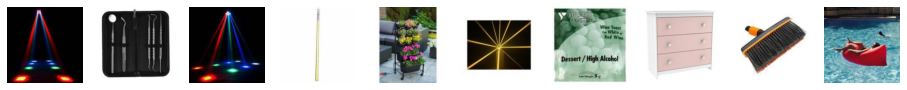

In [113]:

search_similar_image('2804_0.jpg', 10)

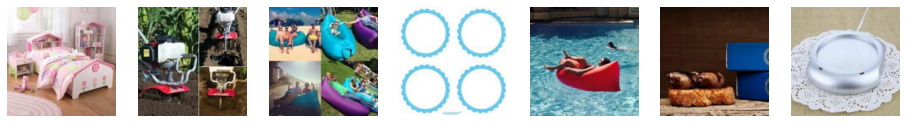

In [116]:
search_similar_image('50035_1.jpg', 7)